<a href="https://colab.research.google.com/github/muhammadalinoor-1982/ML-Model/blob/main/AI_Enabled_Personalized_Treatment_Plans_for_Cancer_Patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AI-Enabled Personalized Treatment Plans for Cancer Patients

In [1]:
# Import some essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score

In [2]:
# Calculate Time for execution
import time

def format_time(seconds):
    """Convert seconds to hours:minutes:seconds format"""
    hours = int(seconds // 3600)
    minutes = int((seconds % 3600) // 60)
    seconds = seconds % 60
    return f"{hours:02d}h:{minutes:02d}m:{seconds:06.3f}s"

In [3]:
# Connect Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Include Gene and Variation Dataset
variant_df = pd.read_csv('/content/drive/MyDrive/AI/Dataset/Personalized Medicine Redefining Cancer Treatment/training_variants.csv')
print('Total Number of Datapoints: ', variant_df.shape[0])
print('Total Number of Features: ', variant_df.shape[1])
print('All Features Name: ', variant_df.columns.values)
variant_df.sample(5)

Total Number of Datapoints:  3321
Total Number of Features:  4
All Features Name:  ['ID' 'Gene' 'Variation' 'Class']


ID   Gene Variation  Class
370    370   TP53     R273L      4
1304  1304   MLH1     A111P      1
1472  1472  FGFR2     S252W      7
3275  3275    RET     V804L      2
1542  1542    ALK    F1245V      7

In [5]:
# Include Description Dataset
text_df = pd.read_csv('/content/drive/MyDrive/AI/Dataset/Personalized Medicine Redefining Cancer Treatment/training_text.csv', sep='\|\|', engine='python', names=['ID', 'TEXT'], skiprows=1)
print('Total Number of Datapoints: ', text_df.shape[0])
print('Total Number of Features: ', text_df.shape[1])
print('All Features Name: ', text_df.columns.values)
text_df.sample(5)

Total Number of Datapoints:  3321
Total Number of Features:  2
All Features Name:  ['ID' 'TEXT']


ID                                               TEXT
2963  2963  Activating mutations of the activation loop of...
558    558  Smad proteins are the key effectors of the tra...
920    920  Introduction  Pediatric high-grade gliomas (HG...
1804  1804  Targeted cancer therapies often induce “outlie...
1915  1915   Basal activities of adenylate cyclase and gua...

## Text Preprocessing

In [ ]:
# Apply Stop words
from wordcloud import STOPWORDS, WordCloud
wordcloud = set(STOPWORDS)
wordcloud

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [ ]:
# Create a function for word cloud
def create_cloud(string, title=None):
    cloud = WordCloud(height=1080,
                      width=1920,
                      background_color='black',
                      min_font_size=10,
                      stopwords=STOPWORDS).generate(string)
    plt.figure(figsize=(10,20))
    plt.imshow(cloud)
    plt.axis("off")
    if title:
        plt.title(title, fontdict={'fontsize':24})
    plt.show()

In [ ]:
# Call a specific row using ID
text = list(text_df[text_df['ID']==2535]['TEXT'])

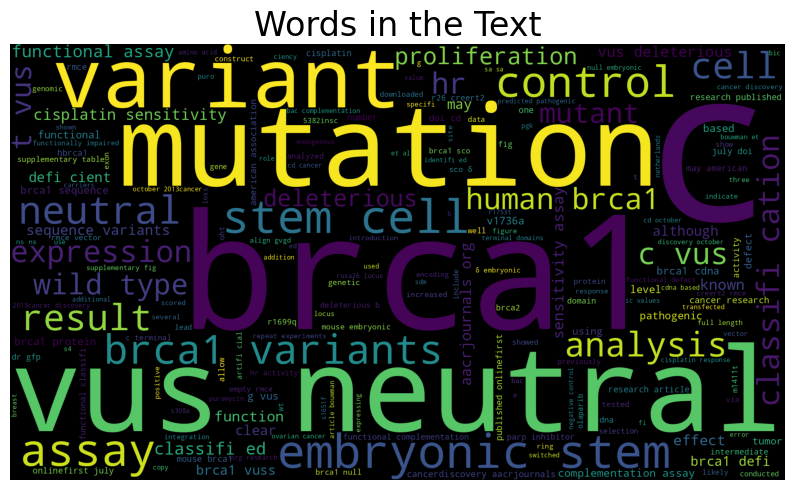

In [ ]:
# Visualize Word Cloud
create_cloud(' '.join(text).lower(), 'Words in the Text')

## Text Cleaning

In [6]:
# Apply regex
import re
from wordcloud import STOPWORDS, WordCloud

In [7]:
# Create a fuunction for text Cleaning and Stemming
stop_words = set(STOPWORDS)

def clean_text(total_text, index, column):
  if type(total_text) is not int:
    text = ''

    # replace every special char with space
    total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)

    # replace multiple spaces with single space
    total_text = re.sub('\s+', ' ', total_text)

    # converting all the chars into lower-case.
    total_text = total_text.lower()

    # Combining all the above sentence

    from tqdm import tqdm
    # tqdm is for printing the status bar

    for word in tqdm(total_text.split()):
    # if the word is a not a stop word then retain that word from the data
      if not word in stop_words:
        text += word + ' '

    text_df[column][index] = text

    from nltk.stem import PorterStemmer
    porter = PorterStemmer()
    list_of_sentence=[]
    for  sentence in total_text:
        words_in_sentence=[]
        for words in sentence.split():
            words_in_sentence.append(porter.stem(words))

        list_of_sentence.append(' '.join(words_in_sentence))
    return(list_of_sentence)

In [8]:
# Call the text cleaning function using a loop for document extraction
for index, row in text_df.iterrows():
  if type(row['TEXT']) is str:
    clean_text(row['TEXT'], index, 'TEXT')
  else:
    print('There is no text description for ID: ', index)

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 4649/4649 [00:00<00:00, 1231406.33it/s]
/tmp/ipython-input-7-3644726959.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in 

There is no text description for ID:  1109


100%|██████████| 15609/15609 [00:00<00:00, 1273168.90it/s]
/tmp/ipython-input-7-3644726959.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  text_df[column][index] = text
/tmp/ipython-input-7-3644726959.py:26: SettingWithCopyWarning: 
A v

There is no text description for ID:  1277


100%|██████████| 21096/21096 [00:00<00:00, 1133656.68it/s]
/tmp/ipython-input-7-3644726959.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  text_df[column][index] = text
/tmp/ipython-input-7-3644726959.py:26: SettingWithCopyWarning: 
A v

There is no text description for ID:  1407


100%|██████████| 5664/5664 [00:00<00:00, 1151720.46it/s]
/tmp/ipython-input-7-3644726959.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  text_df[column][index] = text
/tmp/ipython-input-7-3644726959.py:26: SettingWithCopyWarning: 
A val

There is no text description for ID:  1639


Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 6726/6726 [00:00<00:00, 1191539.48it/s]
/tmp/ipython-input-7-3644726959.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in 

There is no text description for ID:  2755


Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 11428/11428 [00:00<00:00, 1148414.06it/s]
/tmp/ipython-input-7-3644726959.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats i

## Exploratory data analysis (EDA)

In [9]:
# Merge both dataset on ID
df = pd.merge(variant_df, text_df, on='ID', how='left')
df.head()

ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   
2   2     CBL                 Q249E      2   
3   3     CBL                 N454D      3   
4   4     CBL                 L399V      4   

                                                TEXT  
0  cyclin dependent kinases cdks regulate variety...  
1  abstract background non small cell lung cancer...  
2  abstract background non small cell lung cancer...  
3  recent evidence demonstrated acquired uniparen...  
4  oncogenic mutations monomeric casitas b lineag...

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         3321 non-null   int64 
 1   Gene       3321 non-null   object
 2   Variation  3321 non-null   object
 3   Class      3321 non-null   int64 
 4   TEXT       3316 non-null   object
dtypes: int64(2), object(3)
memory usage: 129.9+ KB


In [11]:
# Find Missing values
df.isna().sum()

ID           0
Gene         0
Variation    0
Class        0
TEXT         5
dtype: int64

In [12]:
# Show Missing Values rows
df[df.isnull().any(axis=1)]

ID    Gene             Variation  Class TEXT
1109  1109   FANCA                S1088F      1  NaN
1277  1277  ARID5B  Truncating Mutations      1  NaN
1407  1407   FGFR3                 K508M      6  NaN
1639  1639    FLT1         Amplification      6  NaN
2755  2755    BRAF                 G596C      7  NaN

In [13]:
# Replace missing values with Gene and Variation
df.loc[df['TEXT'].isnull(), 'TEXT'] = df['Gene']+' '+df['Variation']

In [14]:
# Check specific missing values row after replacement
df[df['ID']==2755]

ID  Gene Variation  Class        TEXT
2755  2755  BRAF     G596C      7  BRAF G596C

In [15]:
# Confirm is there any missing value
df.isna().sum()

ID           0
Gene         0
Variation    0
Class        0
TEXT         0
dtype: int64

In [16]:
# Show number of unique data
df['Class'].value_counts(), df.nunique()

(Class
 7    953
 4    686
 1    568
 2    452
 6    275
 5    242
 3     89
 9     37
 8     19
 Name: count, dtype: int64,
 ID           3321
 Gene          264
 Variation    2996
 Class           9
 TEXT         1925
 dtype: int64)

In [39]:
# Show mathematical data
df.describe()

ID        Class
count  3321.000000  3321.000000
mean   1660.000000     4.365854
std     958.834449     2.309781
min       0.000000     1.000000
25%     830.000000     2.000000
50%    1660.000000     4.000000
75%    2490.000000     7.000000
max    3320.000000     9.000000

In [17]:
df.sample(5)

ID    Gene Variation  Class  \
494    494    TP53     Y236D      4   
1208  1208  PIK3CA    D1029Y      2   
24      24     CBL     P417A      4   
2169  2169    PTEN     Y155C      4   
689    689  CDKN2A      A60V      4   

                                                   TEXT  
494   half human cancers associated oneor alteration...  
1208  lung cancer one prevalent cancers worldwide st...  
24    recent evidence demonstrated acquired uniparen...  
2169  pten phosphatase tensin homolog phosphatase un...  
689   inherited mutations affecting ink4a arf locus ...

In [18]:
# Create an input(X) column
df['Gene_Variation_TEXT'] = df['Gene']+' '+df['Variation']+' '+df['TEXT']
df

ID    Gene             Variation  Class  \
0        0  FAM58A  Truncating Mutations      1   
1        1     CBL                 W802*      2   
2        2     CBL                 Q249E      2   
3        3     CBL                 N454D      3   
4        4     CBL                 L399V      4   
...    ...     ...                   ...    ...   
3316  3316   RUNX1                 D171N      4   
3317  3317   RUNX1                 A122*      1   
3318  3318   RUNX1               Fusions      1   
3319  3319   RUNX1                  R80C      4   
3320  3320   RUNX1                  K83E      4   

                                                   TEXT  \
0     cyclin dependent kinases cdks regulate variety...   
1     abstract background non small cell lung cancer...   
2     abstract background non small cell lung cancer...   
3     recent evidence demonstrated acquired uniparen...   
4     oncogenic mutations monomeric casitas b lineag...   
...                                                 ...   
3316  introduction myelodysplastic syndromes mds het...   
3317  introduction myelodysplastic syndromes mds het...   
3318  runt related transcription factor 1 gene runx1...   
3319  runx1 aml1 gene frequent target chromosomal tr...   
3320  frequent mutations associated leukemia recurre...   

                                    Gene_Variation_TEXT  
0     FAM58A Truncating Mutations cyclin dependent k...  
1     CBL W802* abstract background non small cell l...  
2     CBL Q249E abstract background non small cell l...  
3     CBL N454D recent evidence demonstrated acquire...  
4     CBL L399V oncogenic mutations monomeric casita...  
...                                                 ...  
3316  RUNX1 D171N introduction myelodysplastic syndr...  
3317  RUNX1 A122* introduction myelodysplastic syndr...  
3318  RUNX1 Fusions runt related transcription facto...  
3319  RUNX1 R80C runx1 aml1 gene frequent target chr...  
3320  RUNX1 K83E frequent mutations associated leuke...  

[3321 rows x 6 columns]

In [19]:
# Specify X, y, and Raw data
y_raw = df['Class']
X_raw = df['Gene_Variation_TEXT']
documents = df['Gene_Variation_TEXT'].values

In [20]:
y_raw.value_counts(), y_raw.nunique()

(Class
 7    953
 4    686
 1    568
 2    452
 6    275
 5    242
 3     89
 9     37
 8     19
 Name: count, dtype: int64,
 9)

## Natural Language Processing

In [21]:
# Apply TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_df=0.9, min_df=3, sublinear_tf=True, max_features=30000)
X_tfidf = tfidf.fit_transform(X_raw)
X_tfidf,X_tfidf.shape

(<Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 6959711 stored elements and shape (3321, 30000)>,
 (3321, 30000))

In [22]:
# Dimensionality reduction with TruncatedSVD (PCA for sparse data)
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100, random_state=42)
X_reduced = svd.fit_transform(X_tfidf)

In [23]:
# Outlier removal using Isolation Forest from tfidf sparse Matrix
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.02, random_state=42)
iso_labels = iso.fit_predict(X_reduced)

In [24]:
# Local Outlier Factor (LOF)
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=50, contamination=0.02)
lof_labels = lof.fit_predict(X_reduced)  # -1 = outlier

In [25]:
# Z-score on document length
from scipy.stats import zscore
doc_lengths = np.array([len(doc.split()) for doc in documents])
z_scores = zscore(doc_lengths)
length_mask = np.abs(z_scores) < 3  # keep only normal-length documents

In [26]:
# Combine all masks (keep rows where all agree on inliers)
mask = (iso_labels == 1) & (lof_labels == 1) & length_mask

In [27]:
# Filter cleaned data
X_clean = X_tfidf[mask]
y_clean = y_raw[mask]
documents_clean = documents[mask]

In [28]:
# Print number of befor and after cleaning row
print(f"Original samples: {len(y_raw)}")
print(f"Samples after cleaning: {len(y_clean)}")

Original samples: 3321
Samples after cleaning: 3141


In [29]:
# Convert TF-IDF (sparse) Matrix to Dense Format
X_dense = X_tfidf.toarray()

In [30]:
# Reduce to 2D using PCA: Prepare to visualize data
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_dense) # Sequence of convertion: X_raw > X_tfidf > X_dense > X_pca
X_pca_clean = X_pca[mask]

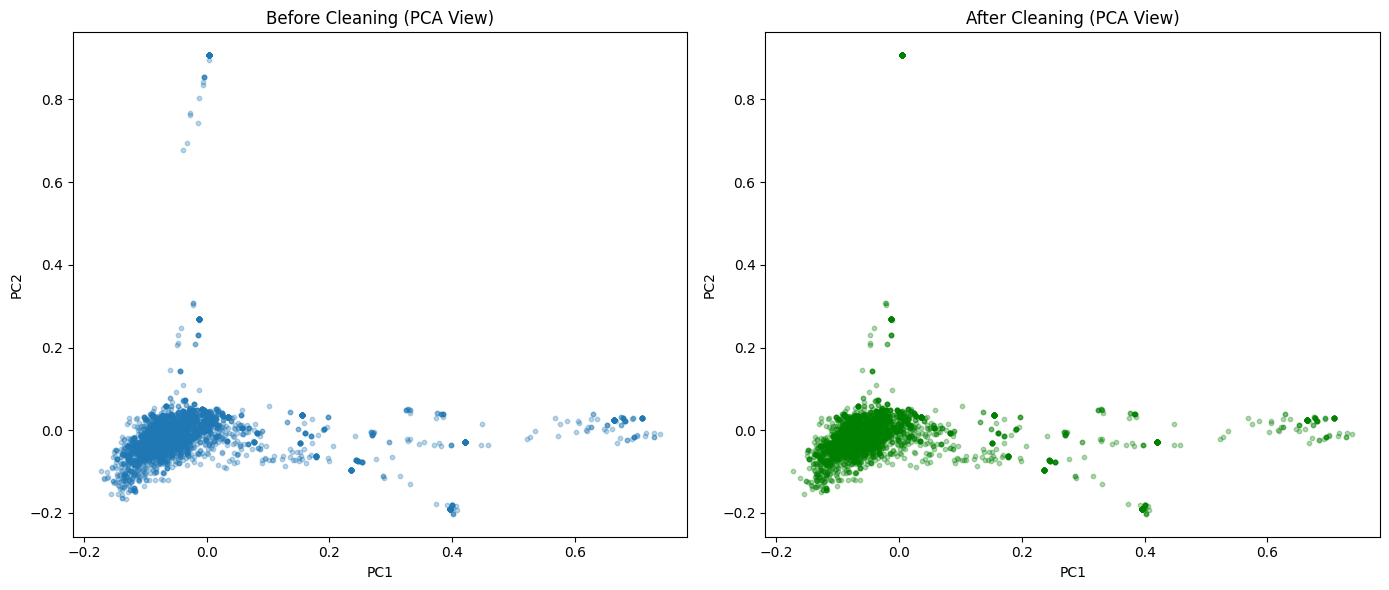

In [31]:
# Plot befor outlier reduction and after outlier reduction
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10, alpha=0.3, label='All')
plt.title("Before Cleaning (PCA View)")
plt.xlabel("PC1"); plt.ylabel("PC2")

plt.subplot(1, 2, 2)
plt.scatter(X_pca_clean[:, 0], X_pca_clean[:, 1], s=10, c='green', alpha=0.3, label='Cleaned')
plt.title("After Cleaning (PCA View)")
plt.xlabel("PC1"); plt.ylabel("PC2")

plt.tight_layout()
plt.show()

In [32]:
# After reduction of outliers new X and y
X = X_clean
y = y_clean

In [33]:
# Apply standardization
from sklearn.preprocessing import StandardScaler

std = StandardScaler(with_mean=False)
X = std.fit_transform(X)
X, X.shape

(<Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 6378386 stored elements and shape (3141, 30000)>,
 (3141, 30000))

In [34]:
# Apply SMOTE to balance data
from imblearn.over_sampling import SMOTE
smote = SMOTE()

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled, y_resampled

(<Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 19236748 stored elements and shape (8082, 30000)>,
 0       1
 1       2
 2       2
 3       3
 4       4
        ..
 8077    9
 8078    9
 8079    9
 8080    9
 8081    9
 Name: Class, Length: 8082, dtype: int64)

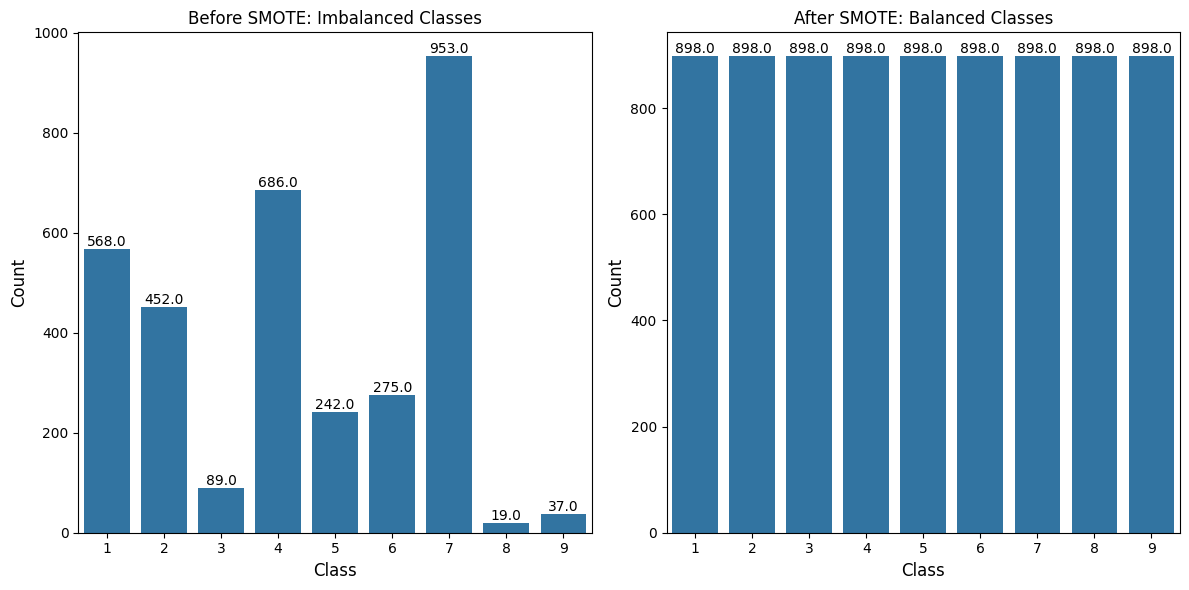

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot Before SMOTE
sns.countplot(x='Class', data=variant_df, ax=axes[0])
axes[0].set_title('Before SMOTE: Imbalanced Classes', fontsize=12)
axes[0].set_xlabel('Class', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Plot After SMOTE
sns.countplot(x=y_resampled, ax=axes[1])
axes[1].set_title('After SMOTE: Balanced Classes', fontsize=12)
axes[1].set_xlabel('Class', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)

# Add count labels to both plots
for ax in axes:
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom')

# Adjust layout and save
plt.tight_layout()
plt.savefig("Before_After_SMOTE.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

In [35]:
# Prepare data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6465, 30000), (1617, 30000), (6465,), (1617,))

In [36]:
# Basic formatting
# print("\033[1mThis is bold text\033[0m")
# print("\033[31mThis is red text\033[0m")
# print("\033[1;91mThis is bold red text\033[0m")
# print("\033[1;92mThis is bold red text\033[0m")

# Define reusable color codes
class Colors:
    RED = '\033[91m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    BLUE = '\033[94m'
    MAGENTA = '\033[95m'
    CYAN = '\033[96m'
    WHITE = '\033[97m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'  # Reset to default

# Usage
# print(f"{Colors.BOLD}{Colors.RED}Warning!{Colors.END} This is important")

## 1. K Nearest Neighbor

In [ ]:
start_time = time.time()

from sklearn.neighbors import KNeighborsClassifier
params = {
    'metric': 'cosine',        # Often best for text data
    'n_neighbors': 7,          # Typically 5-11 for medical data
    'p': 2,                    # Standard Euclidean
    'weights': 'distance'      # Weight by inverse distance
}
KNN_model = KNeighborsClassifier(
    #algorithm='kd_tree',  # or 'ball_tree' for high dimensions
    leaf_size=30,
    algorithm='auto',
    n_jobs=-1,
    **params
)
KNN_model.fit(X_train, y_train)

y_pred_train = KNN_model.predict(X_train)
print(f"{Colors.BOLD}{Colors.GREEN}Accuracy Score for KNN Training: {Colors.BOLD}{Colors.RED}{accuracy_score(y_pred_train,y_train)}{Colors.END}")
print("\nClassification Report for KNN Training:\n", classification_report(y_pred_train, y_train))

elapsed = time.time() - start_time
print(f"Execution time: {format_time(elapsed)}")

Accuracy Score for KNN Training: 0.9472544470224284

Classification Report for KNN Training:
               precision    recall  f1-score   support

           1       0.94      0.87      0.91       786
           2       0.98      0.97      0.97       727
           3       0.88      0.95      0.91       665
           4       0.95      0.97      0.96       703
           5       0.88      0.93      0.90       682
           6       0.98      0.98      0.98       712
           7       0.92      0.88      0.90       773
           8       1.00      1.00      1.00       698
           9       0.99      1.00      0.99       719

    accuracy                           0.95      6465
   macro avg       0.95      0.95      0.95      6465
weighted avg       0.95      0.95      0.95      6465

Execution time: 00h:01m:23.250s


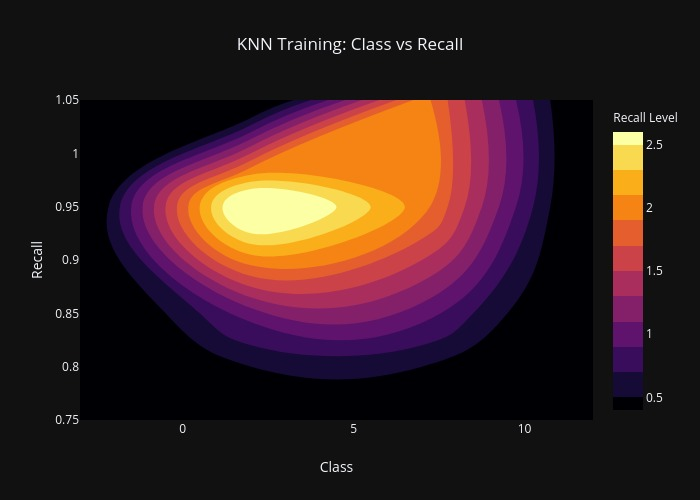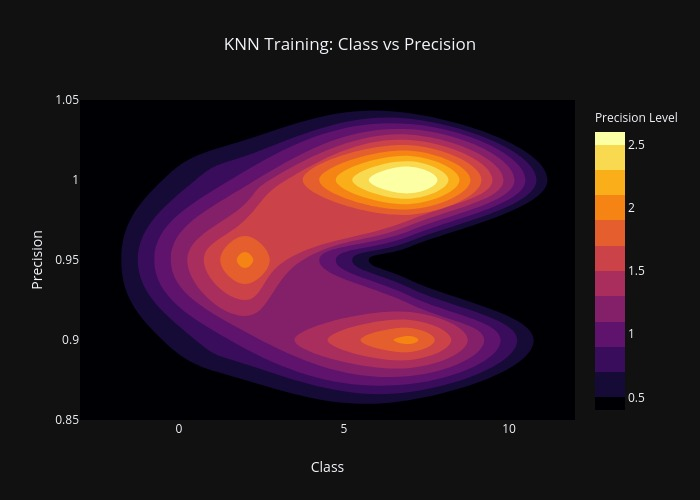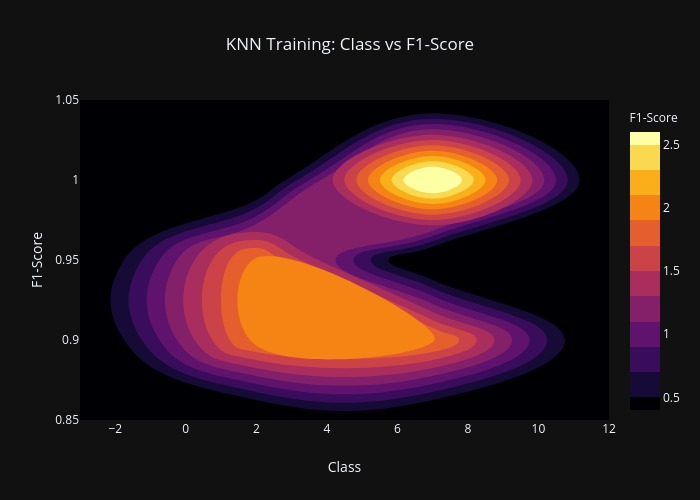

In [ ]:
# Testing K Nearest Neighbor
y_pred_test = KNN_model.predict(X_test)
print(f"{Colors.BOLD}{Colors.GREEN}Accuracy Score for KNN Testing: {Colors.BOLD}{Colors.RED}{accuracy_score(y_pred_test,y_test)}{Colors.END}")
print("\nClassification Report for KNN Testing:\n", classification_report(y_pred_test, y_test))

Accuracy Score for KNN Testing: 0.8404452690166976

Classification Report for KNN Testing:
               precision    recall  f1-score   support

           1       0.75      0.70      0.72       178
           2       0.83      0.77      0.80       191
           3       0.84      0.86      0.85       182
           4       0.74      0.86      0.79       157
           5       0.78      0.84      0.81       165
           6       0.94      0.94      0.94       188
           7       0.66      0.64      0.65       170
           8       1.00      0.96      0.98       208
           9       0.99      0.97      0.98       178

    accuracy                           0.84      1617
   macro avg       0.84      0.84      0.84      1617
weighted avg       0.84      0.84      0.84      1617



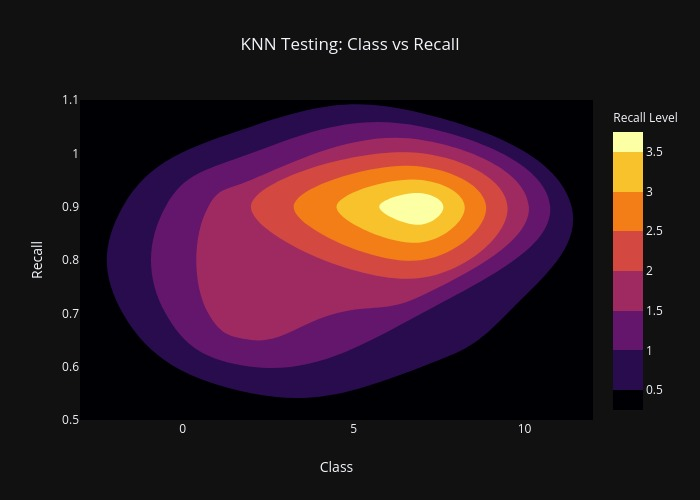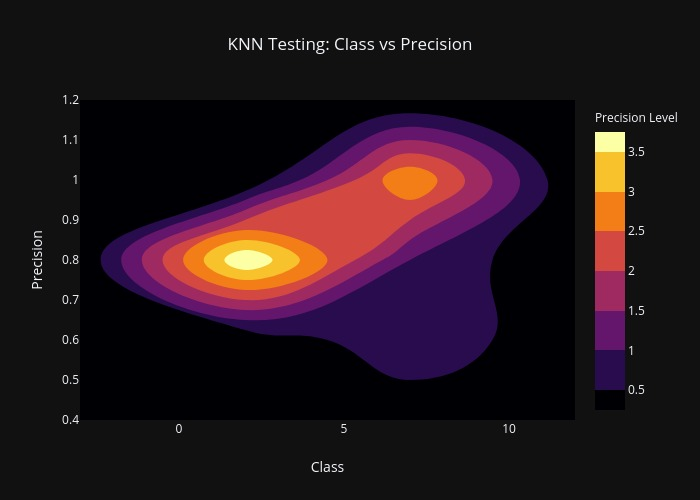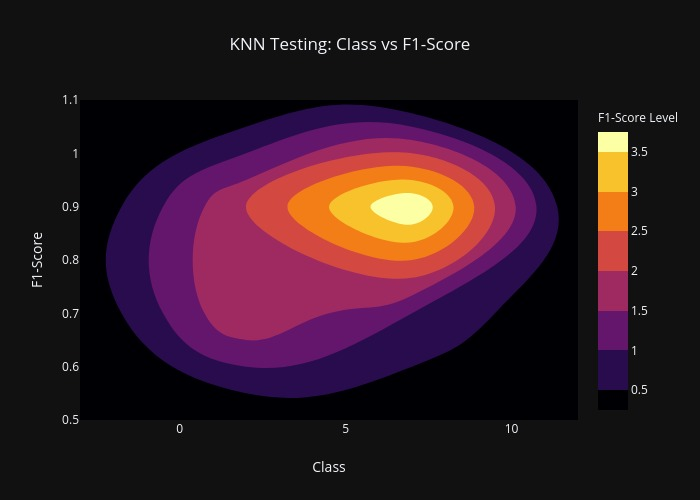

## 2. Logistic Regression

In [ ]:
start_time = time.time()

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)

y_pred_train = lr_model.predict(X_train)
#print("Accuracy Score for Training:", accuracy_score(y_pred_train, y_train))
print(f"{Colors.BOLD}{Colors.GREEN}Accuracy Score for LR Training: {Colors.BOLD}{Colors.RED}{accuracy_score(y_pred_train,y_train)}{Colors.END}")
print("\nClassification Report for Training:\n", classification_report(y_pred_train, y_train))

elapsed = time.time() - start_time
print(f"Execution time: {format_time(elapsed)}")

Accuracy Score for LR Training: 0.9495746326372776

Classification Report for Training:
               precision    recall  f1-score   support

           1       0.88      0.93      0.90       697
           2       0.96      0.97      0.97       710
           3       0.98      0.91      0.95       769
           4       0.91      0.95      0.93       686
           5       0.94      0.86      0.90       786
           6       0.97      0.97      0.97       712
           7       0.90      0.97      0.93       681
           8       1.00      1.00      1.00       698
           9       1.00      1.00      1.00       726

    accuracy                           0.95      6465
   macro avg       0.95      0.95      0.95      6465
weighted avg       0.95      0.95      0.95      6465

Execution time: 00h:16m:58.343s


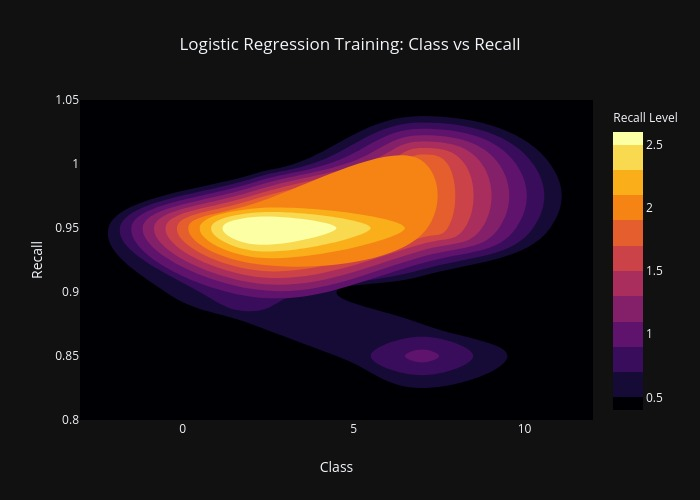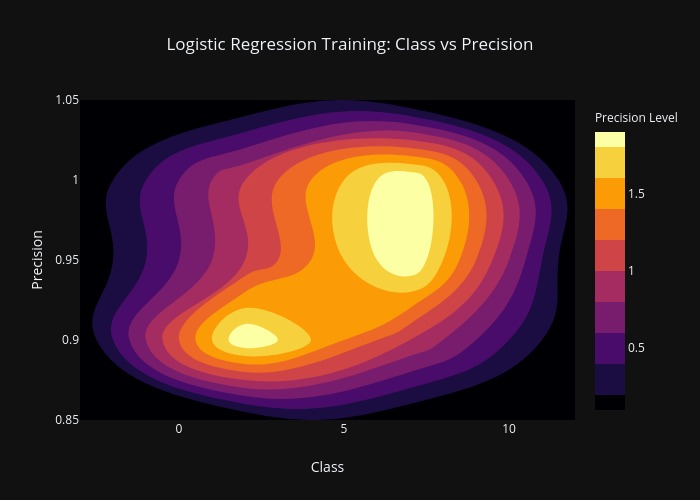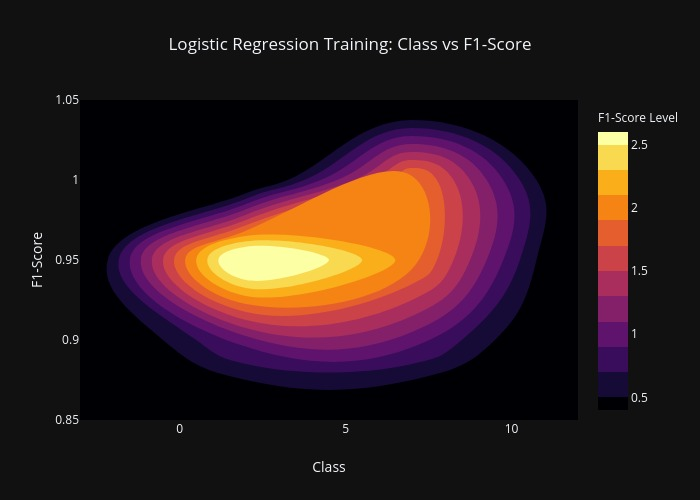

In [ ]:
# Testing Logistic Regression
y_pred_test = lr_model.predict(X_test)
#print("Accuracy Score for Testing:", accuracy_score(y_pred_test, y_test))
print(f"{Colors.BOLD}{Colors.GREEN}Accuracy Score for LR Testing: {Colors.BOLD}{Colors.RED}{accuracy_score(y_pred_test,y_test)}{Colors.END}")
print("\nClassification Report for Testing:\n", classification_report(y_pred_test, y_test))

Accuracy Score for LR Testing: 0.8855905998763142

Classification Report for Testing:
               precision    recall  f1-score   support

           1       0.78      0.77      0.78       170
           2       0.83      0.78      0.80       188
           3       0.98      0.96      0.97       191
           4       0.75      0.90      0.82       153
           5       0.95      0.84      0.89       200
           6       0.95      0.92      0.93       194
           7       0.70      0.79      0.74       145
           8       1.00      0.99      1.00       200
           9       1.00      0.98      0.99       176

    accuracy                           0.89      1617
   macro avg       0.88      0.88      0.88      1617
weighted avg       0.89      0.89      0.89      1617



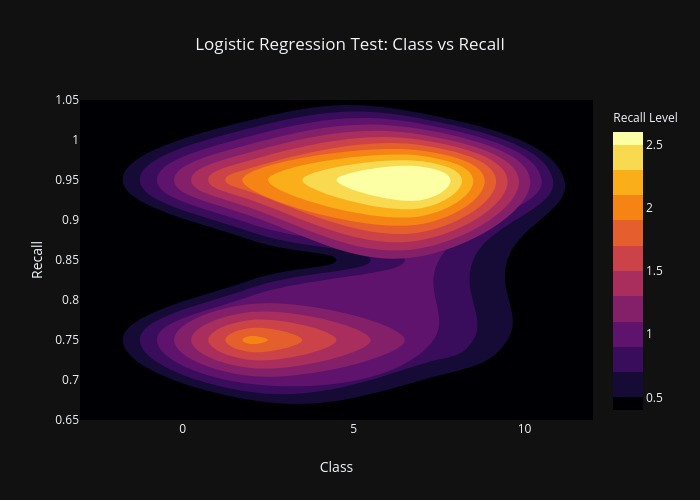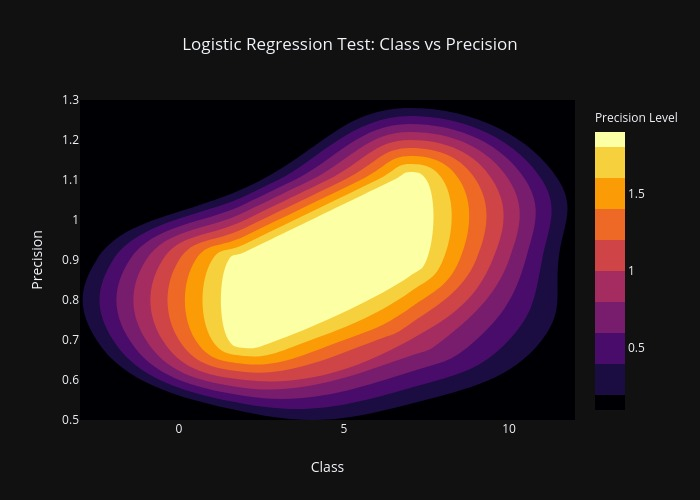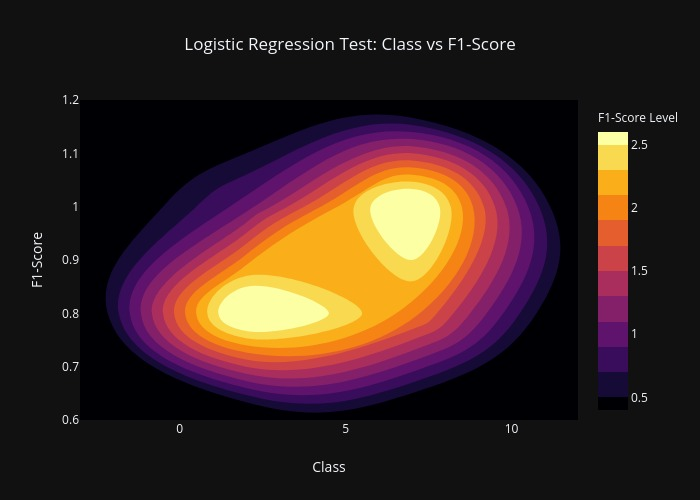

## 3. Support Vector Machine

In [ ]:
start_time = time.time()

from sklearn.svm import LinearSVC
svm_model = LinearSVC(max_iter=10000)
svm_model.fit(X_train, y_train)

y_pred_train = svm_model.predict(X_train)
#print("Accuracy Score for Training:", accuracy_score(y_pred_train, y_train))
print(f"{Colors.BOLD}{Colors.GREEN}Accuracy Score for SVM Training: {Colors.BOLD}{Colors.RED}{accuracy_score(y_pred_train,y_train)}{Colors.END}")
print("\nClassification Report for Training:\n", classification_report(y_pred_train, y_train))

elapsed = time.time() - start_time
print(f"Execution time: {format_time(elapsed)}")

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy Score for SVM Training: 0.9348801237432328

Classification Report for Training:
               precision    recall  f1-score   support

           1       0.88      0.89      0.88       718
           2       0.97      0.97      0.97       720
           3       0.88      0.95      0.91       665
           4       0.92      0.93      0.92       711
           5       0.89      0.85      0.87       758
           6       0.98      0.95      0.97       726
           7       0.90      0.89      0.90       745
           8       1.00      1.00      1.00       697
           9       1.00      1.00      1.00       725

    accuracy                           0.93      6465
   macro avg       0.94      0.94      0.94      6465
weighted avg       0.94      0.93      0.93      6465

Execution time: 00h:21m:57.469s


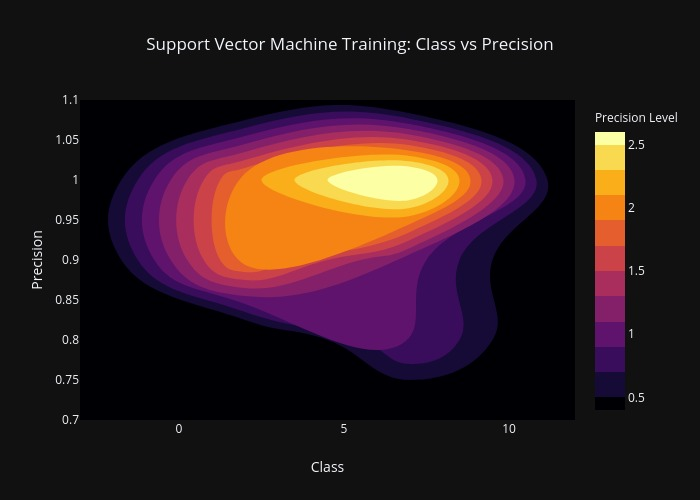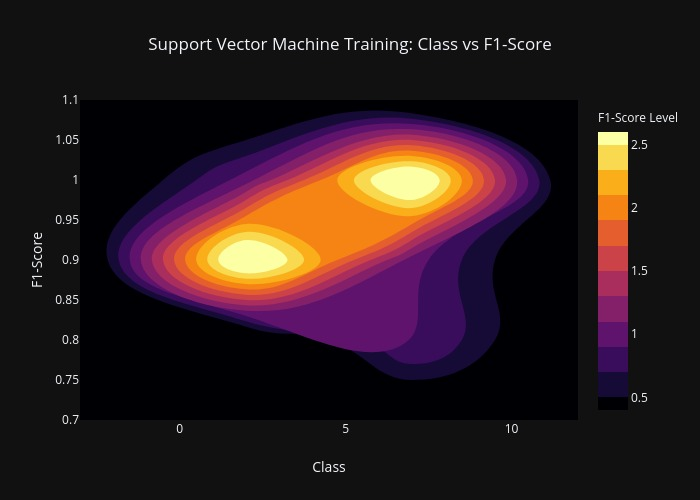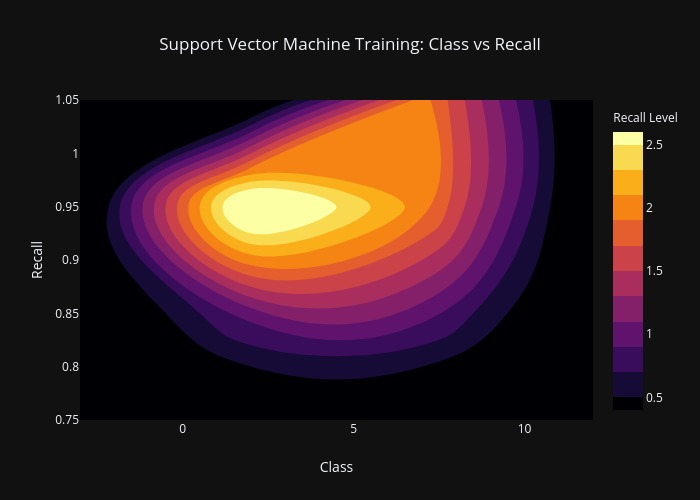

In [ ]:
# Testing Support Vector Machine
y_pred_test = svm_model.predict(X_test)
#print("Accuracy Score for Testing:", accuracy_score(y_pred_test, y_test))
print(f"{Colors.BOLD}{Colors.GREEN}Accuracy Score for SVM Testing: {Colors.BOLD}{Colors.RED}{accuracy_score(y_pred_test,y_test)}{Colors.END}")
print("\nClassification Report for Testing:\n", classification_report(y_pred_test, y_test))

Accuracy Score for SVM Testing: 0.8583797155225726

Classification Report for Testing:
               precision    recall  f1-score   support

           1       0.77      0.70      0.73       184
           2       0.83      0.77      0.80       192
           3       0.87      0.97      0.92       167
           4       0.77      0.88      0.82       159
           5       0.84      0.82      0.83       181
           6       0.95      0.90      0.92       199
           7       0.67      0.71      0.69       156
           8       1.00      0.99      1.00       200
           9       1.00      0.97      0.98       179

    accuracy                           0.86      1617
   macro avg       0.85      0.86      0.85      1617
weighted avg       0.86      0.86      0.86      1617



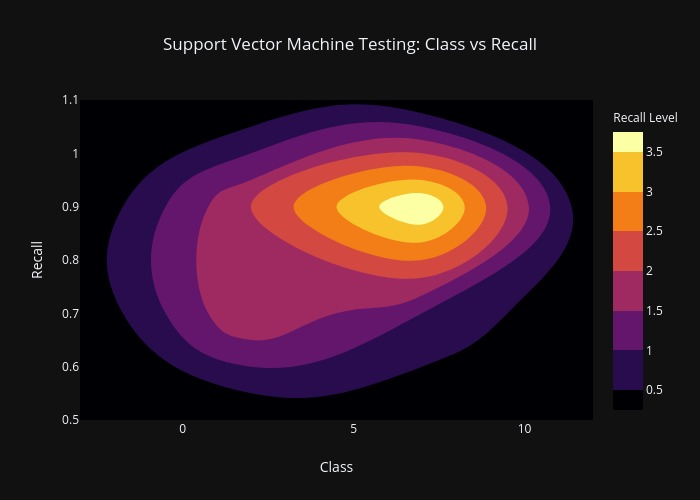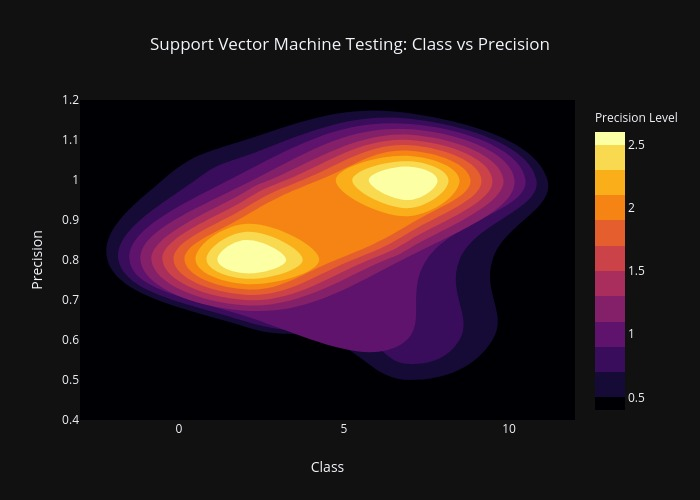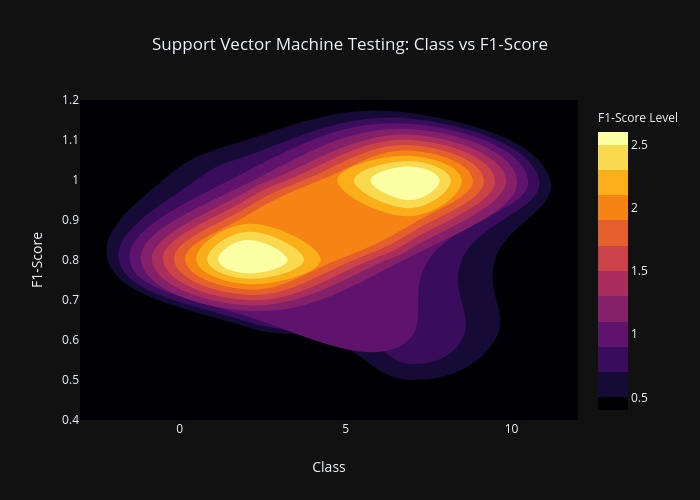

## 4. Random Forest

In [ ]:
start_time = time.time()

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
#print("Accuracy Score for Training:", accuracy_score(y_pred_train, y_train))
print(f"{Colors.BOLD}{Colors.GREEN}Accuracy Score for RF Training: {Colors.BOLD}{Colors.RED}{accuracy_score(y_pred_train,y_train)}{Colors.END}")
print("\nClassification Report for Training:\n", classification_report(y_pred_train, y_train))

elapsed = time.time() - start_time
print(f"Execution time: {format_time(elapsed)}")

Accuracy Score for RF Training: 0.965661252900232

Classification Report for Training:
               precision    recall  f1-score   support

           1       0.91      0.95      0.93       697
           2       0.97      0.98      0.97       716
           3       0.99      0.95      0.97       738
           4       0.96      0.96      0.96       716
           5       0.96      0.91      0.93       755
           6       0.99      0.98      0.98       716
           7       0.93      0.97      0.95       702
           8       1.00      1.00      1.00       698
           9       1.00      1.00      1.00       727

    accuracy                           0.97      6465
   macro avg       0.97      0.97      0.97      6465
weighted avg       0.97      0.97      0.97      6465

Execution time: 00h:07m:47.292s


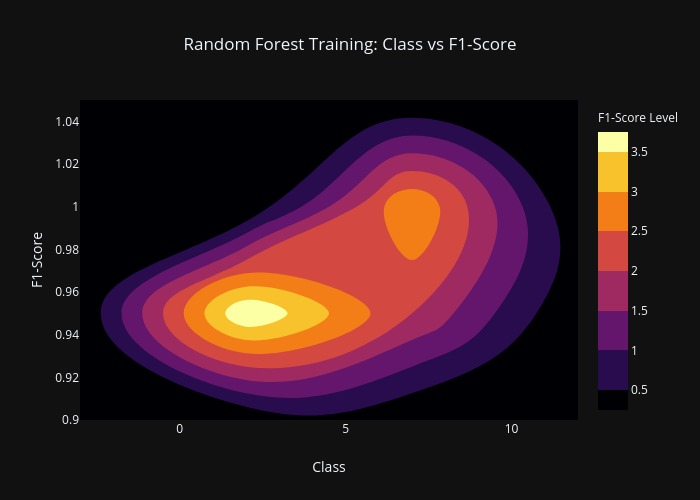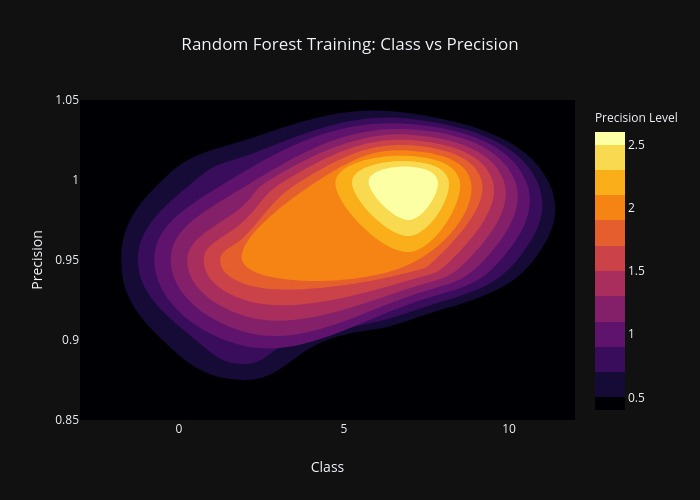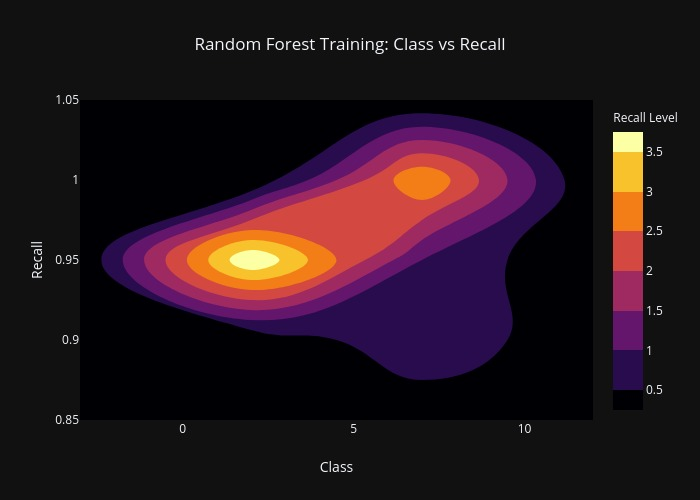

In [ ]:
# Testing Random Forest
y_pred_test = rf_model.predict(X_test)
#print("Accuracy Score for Testing:", accuracy_score(y_pred_test, y_test))
print(f"{Colors.BOLD}{Colors.GREEN}Accuracy Score for RF Testing: {Colors.BOLD}{Colors.RED}{accuracy_score(y_pred_test,y_test)}{Colors.END}")
print("\nClassification Report for Testing:\n", classification_report(y_pred_test, y_test))

Accuracy Score for RF Testing: 0.8806431663574521

Classification Report for Testing:
               precision    recall  f1-score   support

           1       0.80      0.76      0.78       176
           2       0.82      0.82      0.82       178
           3       0.97      0.97      0.97       187
           4       0.78      0.89      0.83       160
           5       0.85      0.87      0.86       172
           6       0.90      0.93      0.92       184
           7       0.77      0.68      0.73       186
           8       1.00      1.00      1.00       199
           9       1.00      0.99      0.99       175

    accuracy                           0.88      1617
   macro avg       0.88      0.88      0.88      1617
weighted avg       0.88      0.88      0.88      1617



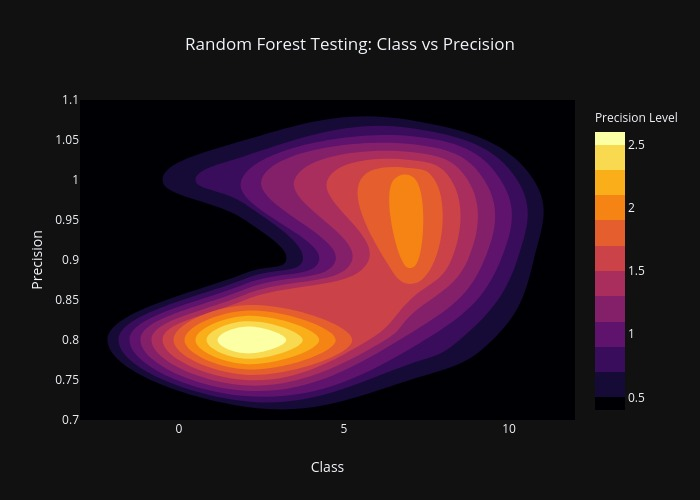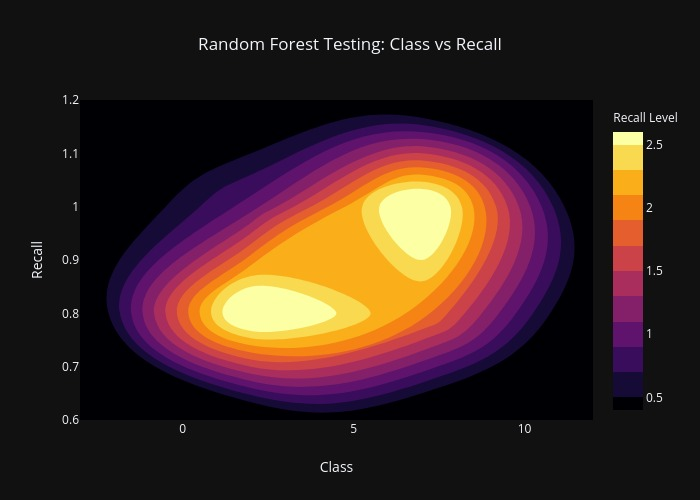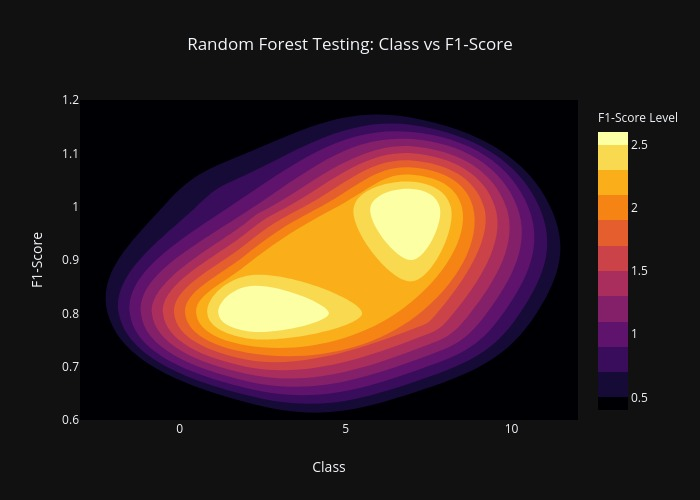

## 5. Decision Tree

In [ ]:
start_time = time.time()

from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred_train = dt_model.predict(X_train)
#print("Accuracy Score for Training:", accuracy_score(y_pred_train, y_train))
print(f"{Colors.BOLD}{Colors.GREEN}Accuracy Score for DT Training: {Colors.BOLD}{Colors.RED}{accuracy_score(y_pred_train,y_train)}{Colors.END}")
print("\nClassification Report for Training:\n", classification_report(y_pred_train, y_train))

elapsed = time.time() - start_time
print(f"Execution time: {format_time(elapsed)}")

Accuracy Score for DT Training: 0.965661252900232

Classification Report for Training:
               precision    recall  f1-score   support

           1       0.93      0.93      0.93       731
           2       0.98      0.97      0.97       732
           3       0.99      0.95      0.97       738
           4       0.95      0.97      0.96       699
           5       0.95      0.92      0.93       740
           6       0.98      0.98      0.98       712
           7       0.92      0.98      0.95       688
           8       1.00      1.00      1.00       698
           9       1.00      1.00      1.00       727

    accuracy                           0.97      6465
   macro avg       0.97      0.97      0.97      6465
weighted avg       0.97      0.97      0.97      6465

Execution time: 00h:01m:07.326s


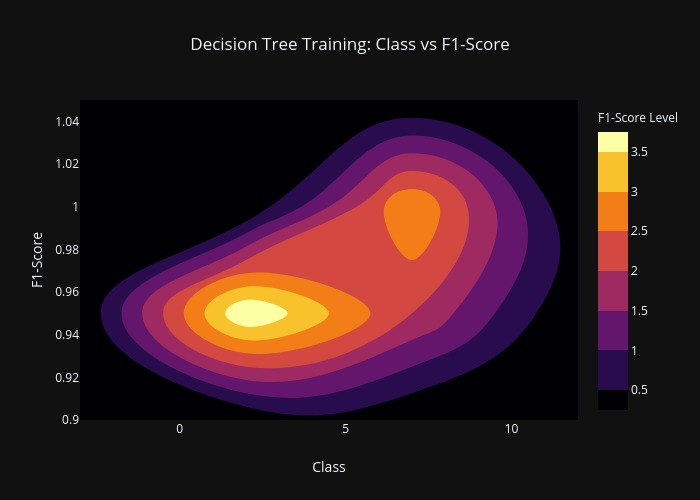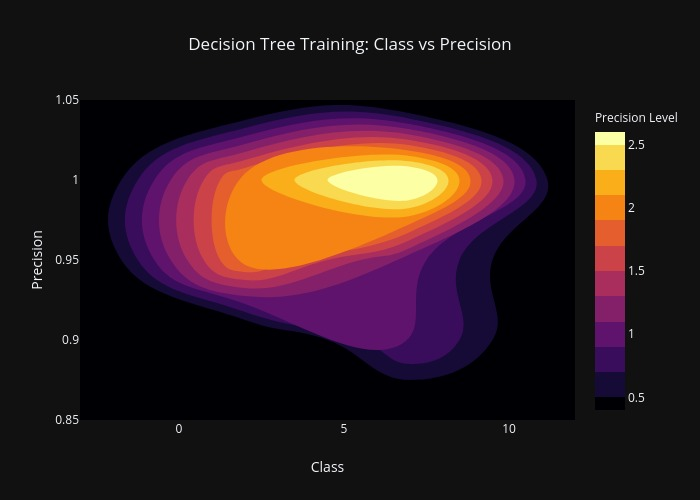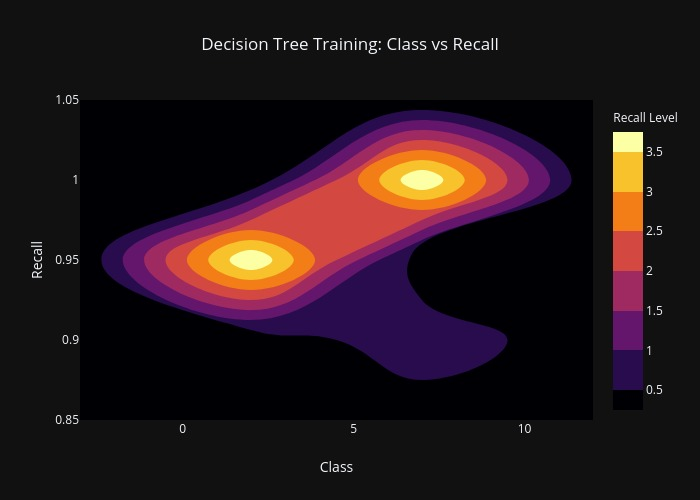

In [ ]:
# Testing Decision Tree
y_pred_test = dt_model.predict(X_test)
#print("Accuracy Score for Testing:", accuracy_score(y_pred_test, y_test))
print(f"{Colors.BOLD}{Colors.GREEN}Accuracy Score for DT Testing: {Colors.BOLD}{Colors.RED}{accuracy_score(y_pred_test,y_test)}{Colors.END}")
print("\nClassification Report for Testing:\n", classification_report(y_pred_test, y_test))

Accuracy Score for DT Testing: 0.8101422387136673

Classification Report for Testing:
               precision    recall  f1-score   support

           1       0.69      0.64      0.66       181
           2       0.72      0.67      0.70       192
           3       0.96      0.90      0.93       198
           4       0.69      0.73      0.71       172
           5       0.76      0.81      0.78       165
           6       0.85      0.94      0.89       172
           7       0.59      0.60      0.59       161
           8       0.99      0.99      0.99       198
           9       1.00      0.97      0.99       178

    accuracy                           0.81      1617
   macro avg       0.80      0.81      0.80      1617
weighted avg       0.81      0.81      0.81      1617



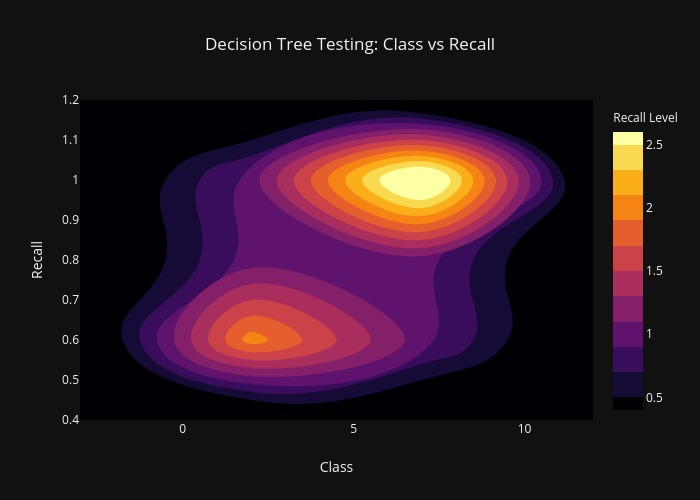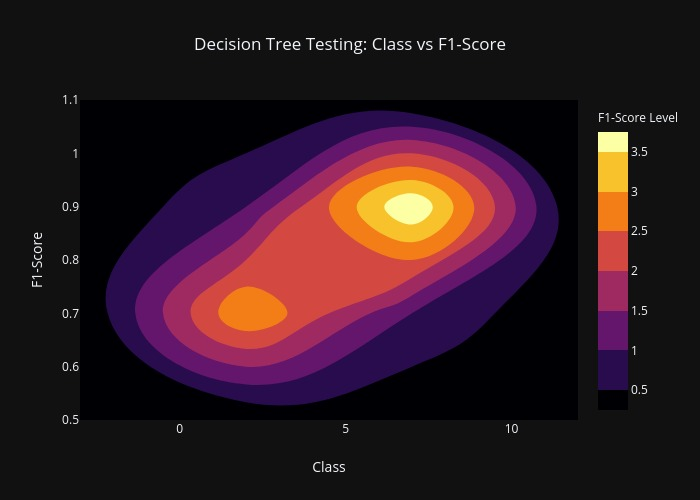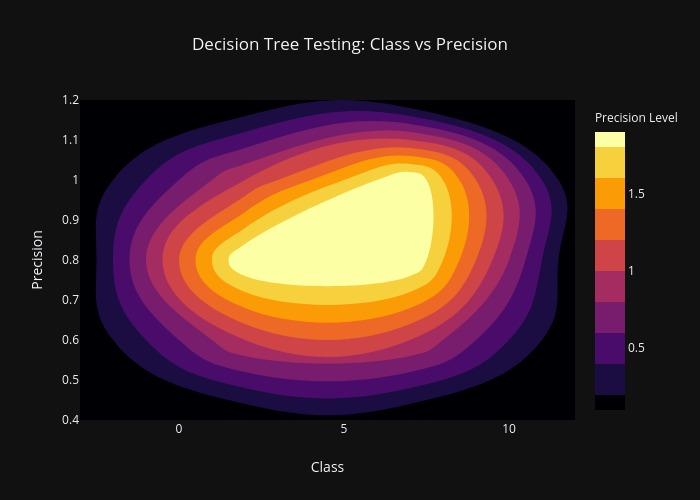

## 6. Gradient Boosting

In [ ]:
start_time = time.time()

from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

y_pred_train = gb_model.predict(X_train)
#print("Accuracy Score for Training:", accuracy_score(y_pred_train, y_train))
print(f"{Colors.BOLD}{Colors.GREEN}Accuracy Score for GB Training: {Colors.BOLD}{Colors.RED}{accuracy_score(y_pred_train,y_train)}{Colors.END}")
print("\nClassification Report for Training:\n", classification_report(y_pred_train, y_train))

elapsed = time.time() - start_time
print(f"Execution time: {format_time(elapsed)}")

Accuracy Score for GB Training: 0.9532869296210363

Classification Report for Training:
               precision    recall  f1-score   support

           1       0.89      0.93      0.91       696
           2       0.95      0.97      0.96       704
           3       0.99      0.94      0.96       748
           4       0.93      0.94      0.94       705
           5       0.93      0.89      0.91       750
           6       0.97      0.98      0.97       705
           7       0.93      0.94      0.93       728
           8       1.00      1.00      1.00       702
           9       1.00      1.00      1.00       727

    accuracy                           0.95      6465
   macro avg       0.95      0.95      0.95      6465
weighted avg       0.95      0.95      0.95      6465

Execution time: 01h:45m:17.588s


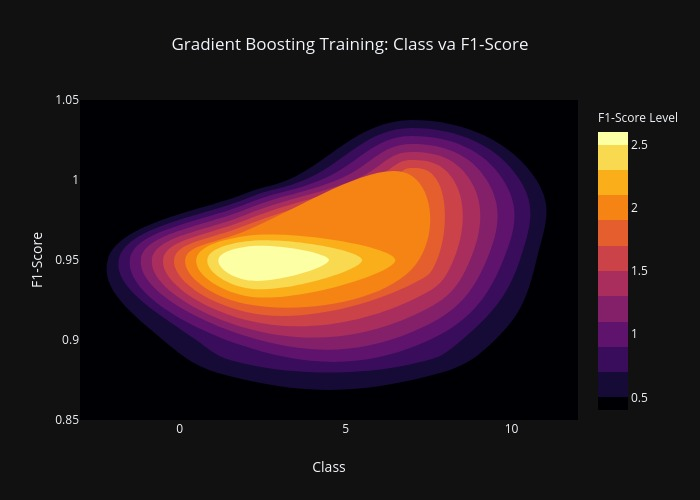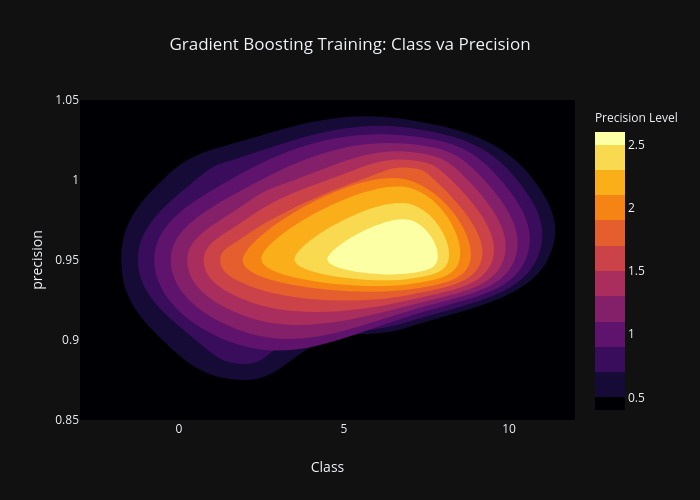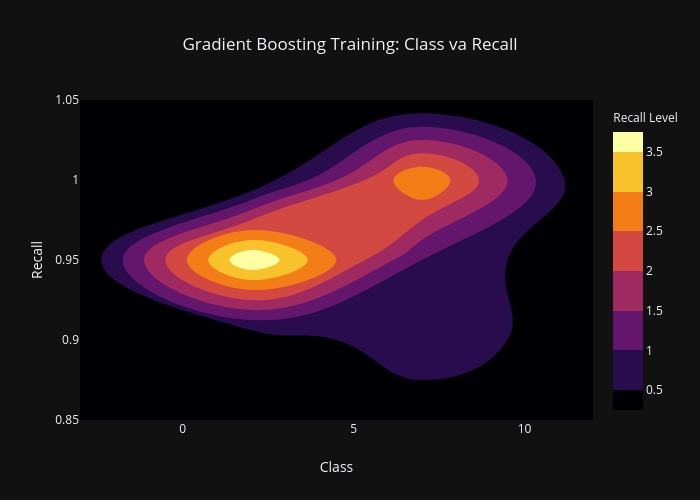

In [ ]:
# Testing Gradient Boosting
y_pred_test = gb_model.predict(X_test)
#print("Accuracy Score for Testing:", accuracy_score(y_pred_test, y_test))
print(f"{Colors.BOLD}{Colors.GREEN}Accuracy Score for GB Testing: {Colors.BOLD}{Colors.RED}{accuracy_score(y_pred_test,y_test)}{Colors.END}")
print("\nClassification Report for Testing:\n", classification_report(y_pred_test, y_test))

Accuracy Score for GB Testing: 0.8750773036487323

Classification Report for Testing:
               precision    recall  f1-score   support

           1       0.77      0.74      0.75       175
           2       0.81      0.81      0.81       177
           3       0.98      0.96      0.97       191
           4       0.79      0.84      0.81       172
           5       0.86      0.84      0.85       182
           6       0.87      0.95      0.91       172
           7       0.77      0.73      0.75       173
           8       1.00      0.99      1.00       200
           9       1.00      0.99      0.99       175

    accuracy                           0.88      1617
   macro avg       0.87      0.87      0.87      1617
weighted avg       0.88      0.88      0.87      1617



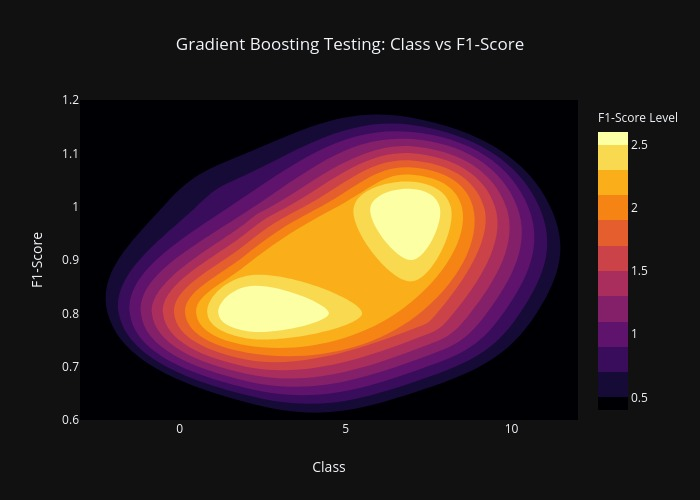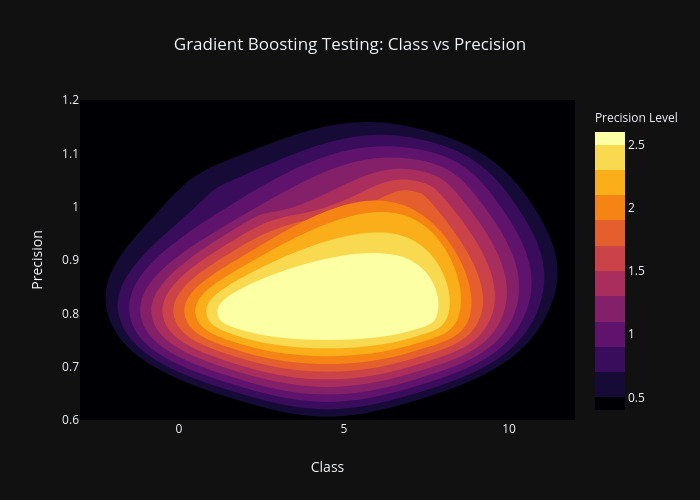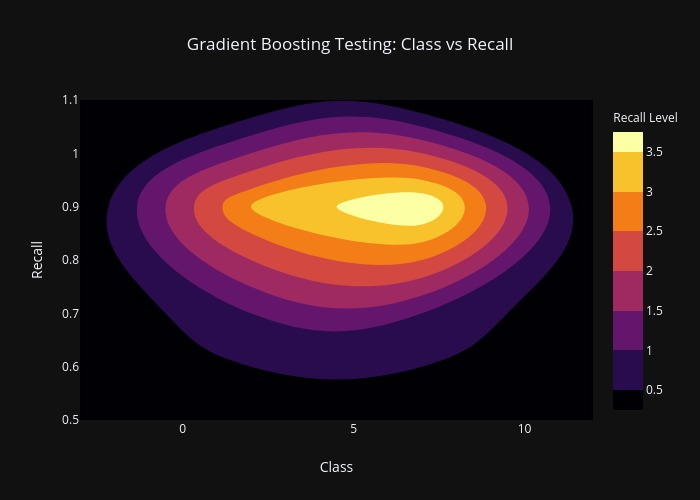

## 7. XG Boost

In [37]:
start_time = time.time()

y_train_xgb = y_train - 1
y_test_xgb = y_test - 1

params = {
    'colsample_bytree': 0.8,       # Typically 0.6-0.9
    'gamma': 0.1,                  # Regularization (0-0.2 common)
    'learning_rate': 0.05,         # Smaller rates better for text
    'max_depth': 5,                # 3-7 is optimal
    'min_child_weight': 1,         # 1-5
    'n_estimators': 200,           # 100-300
    'subsample': 0.8,              # 0.6-1.0
    'tree_method': 'hist',         # Faster training
    'grow_policy': 'lossguide',    # Better for text
    'max_leaves': 31               # Control complexity
}

from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    objective='multi:softprob',
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1,
    **params
)

xgb_model.fit(X_train, y_train_xgb)

y_pred_train = xgb_model.predict(X_train)
#print("Accuracy Score for Training:", accuracy_score(y_pred_train, y_train_xgb))
print(f"{Colors.BOLD}{Colors.GREEN}Accuracy Score for XGB Training: {Colors.BOLD}{Colors.RED}{accuracy_score(y_pred_train,y_train_xgb)}{Colors.END}")
print("\nClassification Report for Training:\n", classification_report(y_pred_train, y_train_xgb))

elapsed = time.time() - start_time
print(f"Execution time: {format_time(elapsed)}")

Accuracy Score for XGB Training: 0.9617942768754834

Classification Report for Training:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       701
           1       0.97      0.98      0.97       711
           2       0.99      0.94      0.96       744
           3       0.94      0.95      0.95       706
           4       0.95      0.91      0.93       753
           5       0.98      0.98      0.98       714
           6       0.93      0.96      0.95       711
           7       1.00      1.00      1.00       698
           8       1.00      1.00      1.00       727

    accuracy                           0.96      6465
   macro avg       0.96      0.96      0.96      6465
weighted avg       0.96      0.96      0.96      6465

Execution time: 01h:41m:29.069s


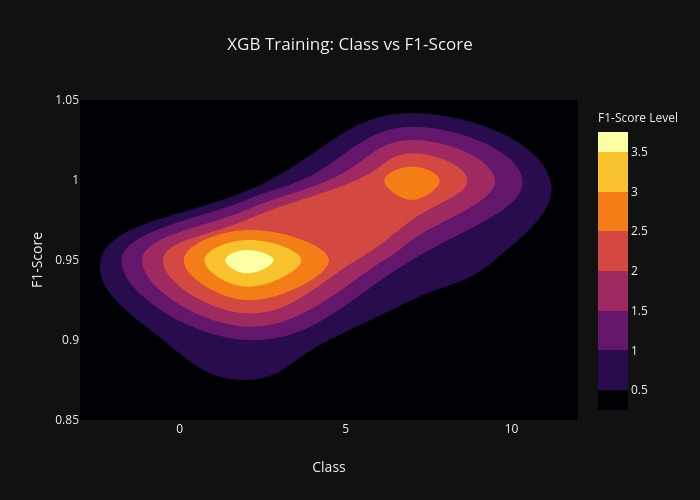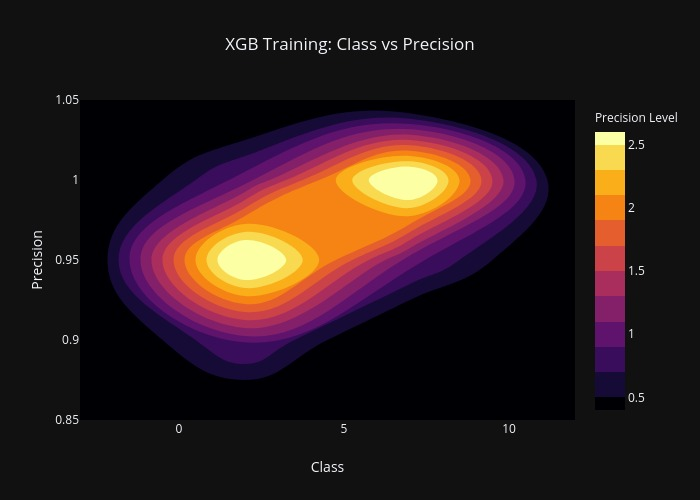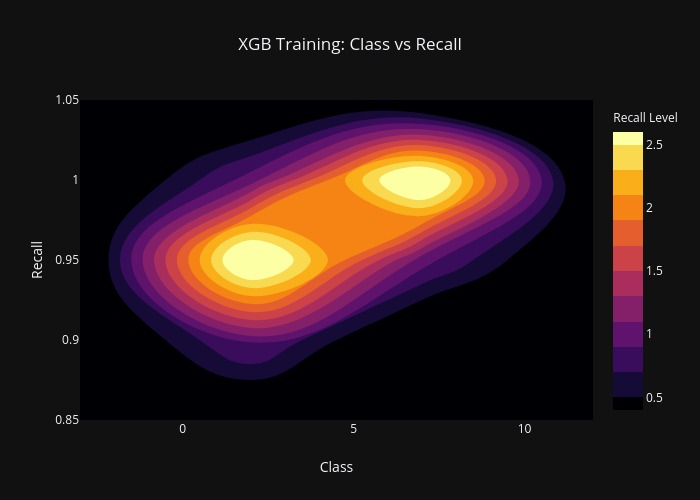

In [ ]:
# Testing XG Boost
y_pred_test = xgb_model.predict(X_test)
#print("Accuracy Score for Testing:", accuracy_score(y_pred_test, y_test_xgb))
print(f"{Colors.BOLD}{Colors.GREEN}Accuracy Score for XGB Testing: {Colors.BOLD}{Colors.RED}{accuracy_score(y_pred_test,y_test_xgb)}{Colors.END}")
print("\nClassification Report for Testing:\n", classification_report(y_pred_test, y_test_xgb))

Accuracy Score for XGB Testing: 0.8837353123067409

Classification Report for Testing:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77       177
           1       0.80      0.82      0.81       175
           2       0.98      0.96      0.97       191
           3       0.79      0.85      0.82       170
           4       0.89      0.87      0.88       181
           5       0.89      0.96      0.92       175
           6       0.79      0.73      0.76       177
           7       0.99      1.00      1.00       198
           8       0.99      0.99      0.99       173

    accuracy                           0.88      1617
   macro avg       0.88      0.88      0.88      1617
weighted avg       0.88      0.88      0.88      1617



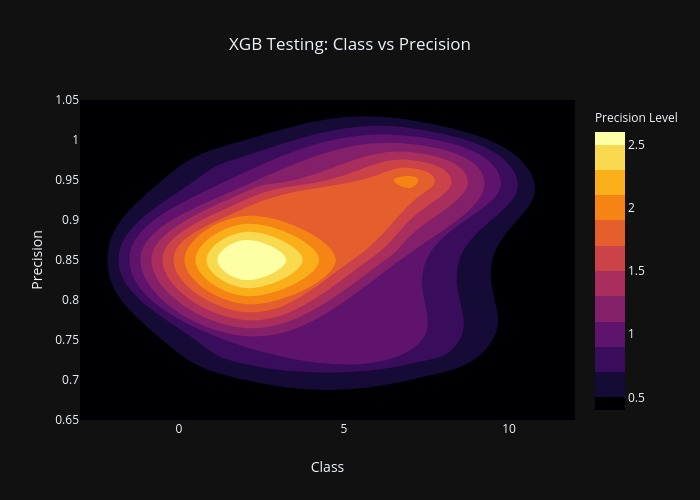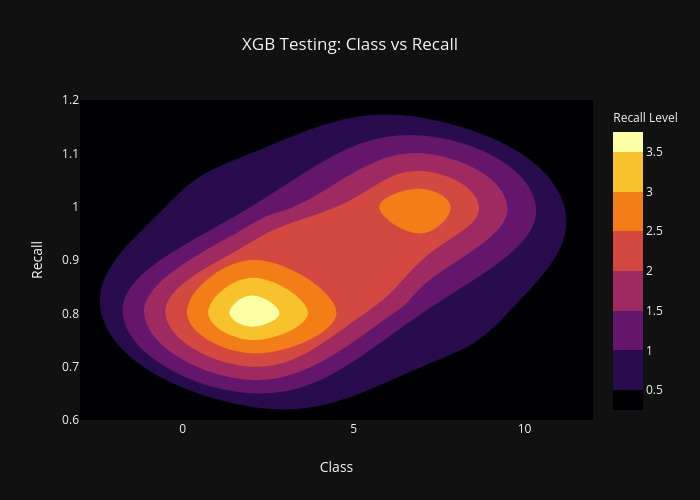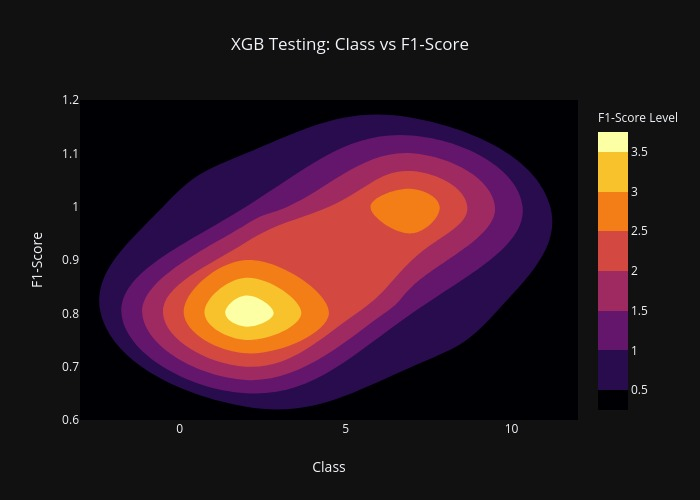

## 8. Gaussian Naive Bayes

In [ ]:
start_time = time.time()

X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB(var_smoothing=1e-7)
nb_model.fit(X_train_dense, y_train)

y_pred_train = nb_model.predict(X_train_dense)
#print("Accuracy Score for Training:", accuracy_score(y_pred_train, y_train))
print(f"{Colors.BOLD}{Colors.GREEN}Accuracy Score for NB Training: {Colors.BOLD}{Colors.RED}{accuracy_score(y_pred_train,y_train)}{Colors.END}")
print("\nClassification Report for Training:\n", classification_report(y_pred_train, y_train))

elapsed = time.time() - start_time
print(f"Execution time: {format_time(elapsed)}")

Accuracy Score for NB Training: 0.8702242846094355

Classification Report for Training:
               precision    recall  f1-score   support

           1       0.79      0.87      0.83       660
           2       0.93      0.89      0.91       751
           3       1.00      0.70      0.82      1019
           4       0.71      0.97      0.82       521
           5       0.70      0.74      0.72       676
           6       0.91      0.90      0.91       715
           7       0.80      0.92      0.86       636
           8       1.00      0.93      0.97       749
           9       1.00      0.98      0.99       738

    accuracy                           0.87      6465
   macro avg       0.87      0.88      0.87      6465
weighted avg       0.89      0.87      0.87      6465

Execution time: 00h:00m:25.133s


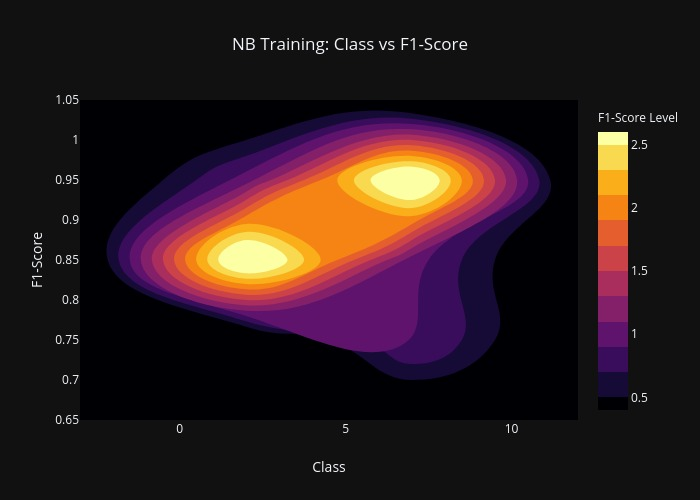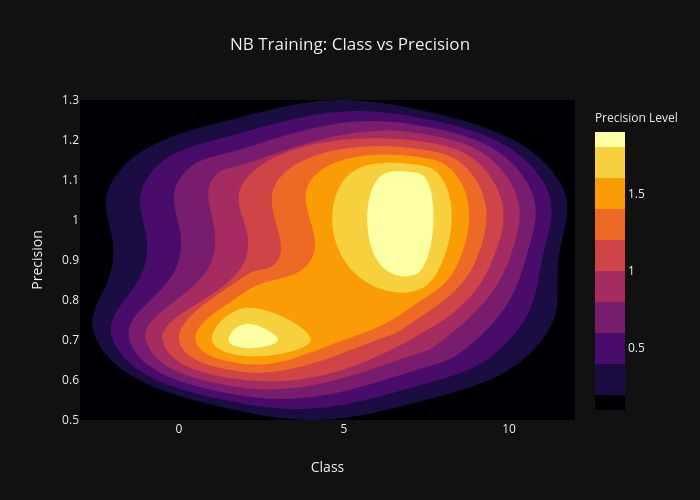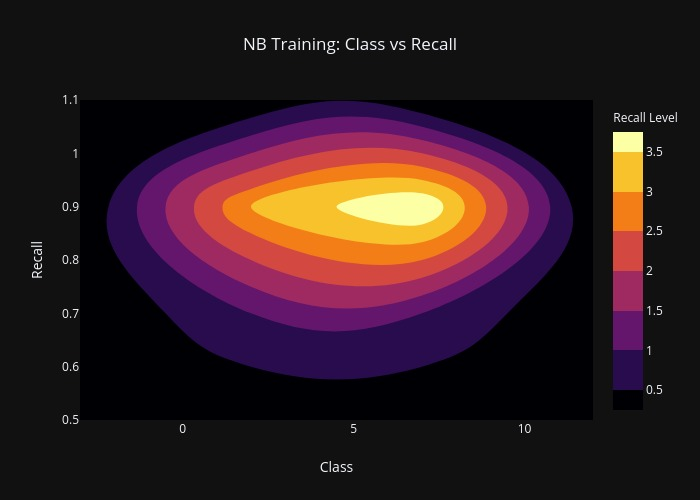

In [ ]:
# Testing Gaussian Naive Bayes
y_pred_test = nb_model.predict(X_test_dense)
#print("Accuracy Score for Testing:", accuracy_score(y_pred_test, y_test))
print(f"{Colors.BOLD}{Colors.GREEN}Accuracy Score for NB Testing: {Colors.BOLD}{Colors.RED}{accuracy_score(y_pred_test,y_test)}{Colors.END}")
print("\nClassification Report for Testing:\n", classification_report(y_pred_test, y_test))

Accuracy Score for NB Testing: 0.8447742733457019

Classification Report for Testing:
               precision    recall  f1-score   support

           1       0.71      0.73      0.72       162
           2       0.85      0.80      0.83       190
           3       0.99      0.77      0.87       242
           4       0.64      0.91      0.75       129
           5       0.69      0.77      0.73       159
           6       0.92      0.91      0.92       191
           7       0.76      0.80      0.78       155
           8       1.00      0.94      0.97       211
           9       1.00      0.97      0.99       178

    accuracy                           0.84      1617
   macro avg       0.84      0.84      0.84      1617
weighted avg       0.86      0.84      0.85      1617



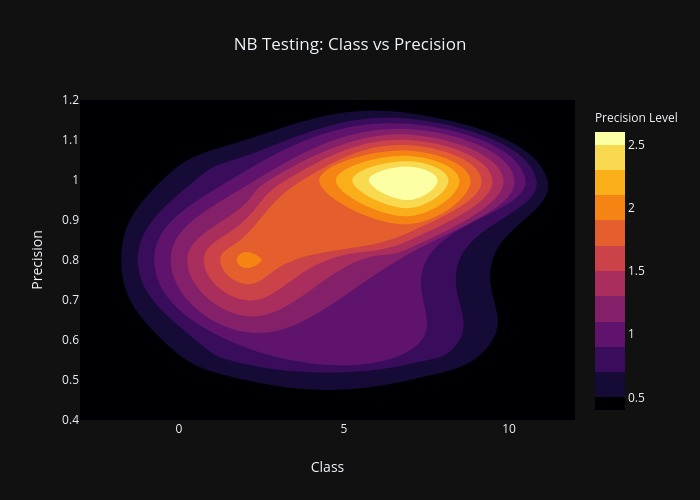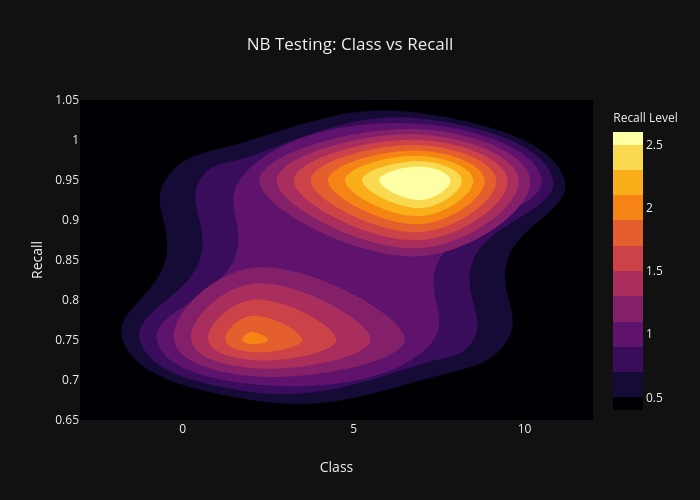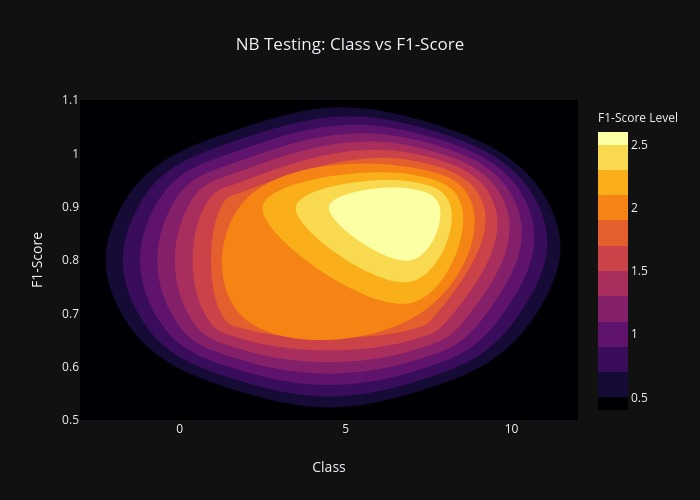

## 9. Multilayer Perceptron Neural Network

In [ ]:
start_time = time.time()

from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)

y_pred_train = mlp_model.predict(X_train)
#print("Accuracy Score for Training:", accuracy_score(y_pred_train, y_train))
print(f"{Colors.BOLD}{Colors.GREEN}Accuracy Score for MLP Training: {Colors.BOLD}{Colors.RED}{accuracy_score(y_pred_train,y_train)}{Colors.END}")
print("\nClassification Report for Training:\n", classification_report(y_pred_train, y_train))

elapsed = time.time() - start_time
print(f"Execution time: {format_time(elapsed)}")

Accuracy Score for MLP Training: 0.9359628770301625

Classification Report for Training:
               precision    recall  f1-score   support

           1       0.85      0.92      0.88       677
           2       0.96      0.95      0.96       726
           3       0.95      0.91      0.93       744
           4       0.92      0.90      0.91       729
           5       0.92      0.84      0.88       791
           6       0.96      0.96      0.96       714
           7       0.87      0.97      0.92       661
           8       1.00      1.00      1.00       697
           9       1.00      1.00      1.00       726

    accuracy                           0.94      6465
   macro avg       0.94      0.94      0.94      6465
weighted avg       0.94      0.94      0.94      6465

Execution time: 00h:08m:09.523s


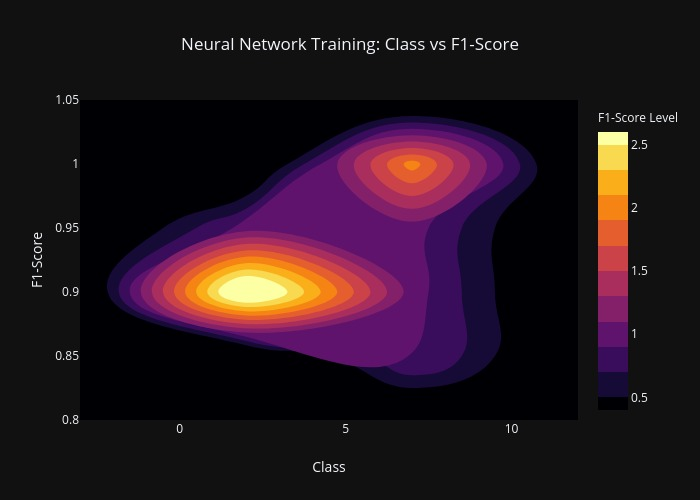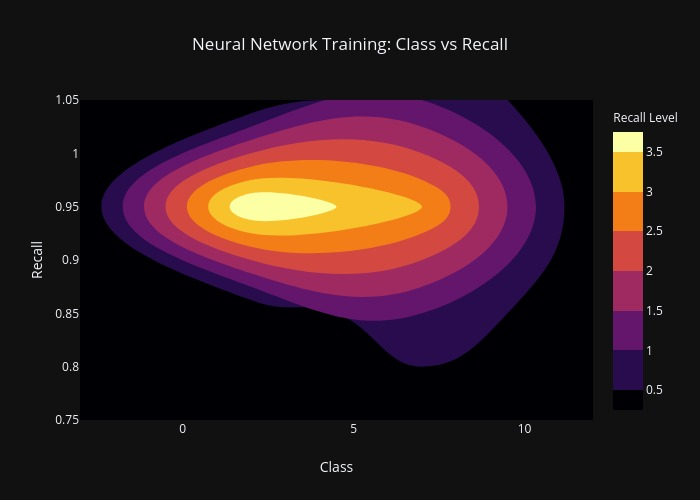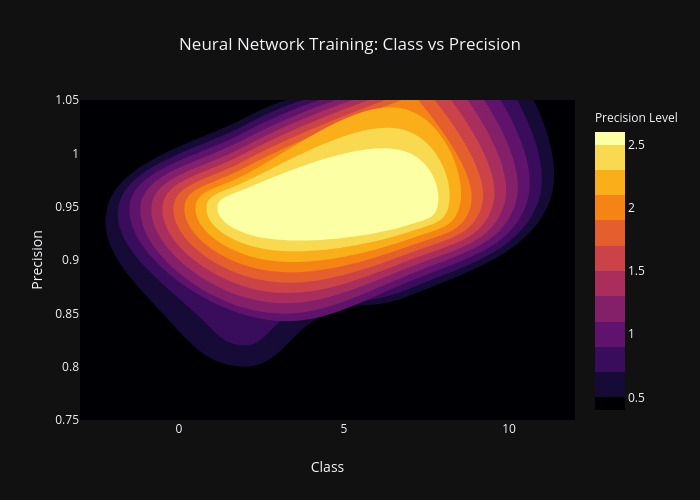

In [ ]:
# Testing Multilayer Perceptron Neural Network
y_pred_test = mlp_model.predict(X_test)
#print("Accuracy Score for Testing:", accuracy_score(y_pred_test, y_test))
print(f"{Colors.BOLD}{Colors.GREEN}Accuracy Score for MLP Testing: {Colors.BOLD}{Colors.RED}{accuracy_score(y_pred_test,y_test)}{Colors.END}")
print("\nClassification Report for Testing:\n", classification_report(y_pred_test, y_test))

Accuracy Score for MLP Testing: 0.8800247371675943

Classification Report for Testing:
               precision    recall  f1-score   support

           1       0.78      0.76      0.77       172
           2       0.85      0.80      0.82       189
           3       0.94      0.95      0.94       184
           4       0.77      0.85      0.80       165
           5       0.92      0.80      0.85       203
           6       0.94      0.96      0.95       185
           7       0.70      0.79      0.74       146
           8       1.00      1.00      1.00       199
           9       1.00      0.99      1.00       174

    accuracy                           0.88      1617
   macro avg       0.88      0.88      0.88      1617
weighted avg       0.88      0.88      0.88      1617



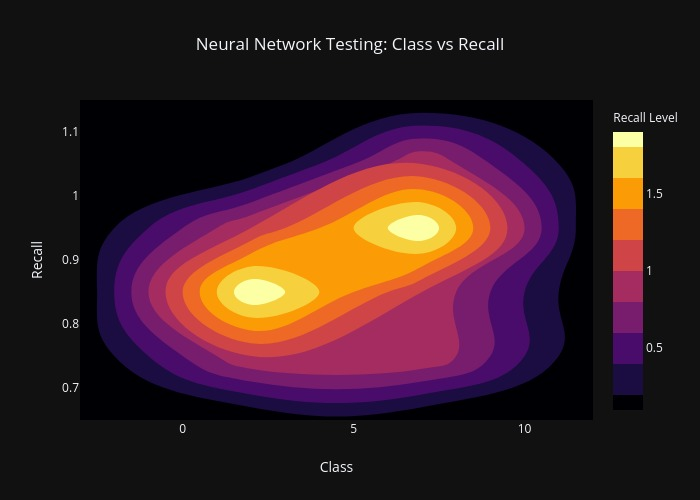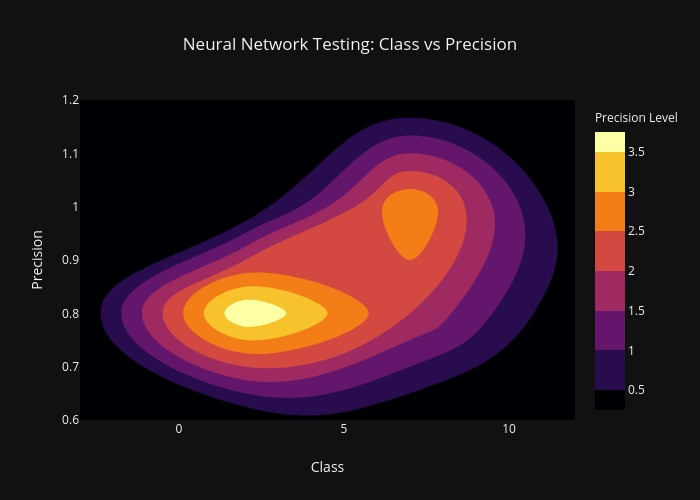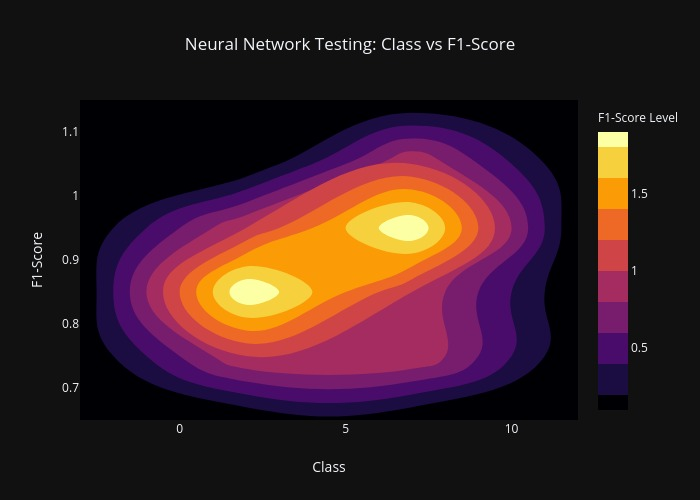

## 10. Voting Classifier

In [ ]:
start_time = time.time()

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

models = [
    ('lr', LogisticRegression(max_iter=10000)),
    ('svc', LinearSVC(max_iter=10000)),
    ('rf', RandomForestClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('gb', GradientBoostingClassifier())
]

from sklearn.ensemble import VotingClassifier
vc_model = VotingClassifier(estimators=models, voting='hard')
vc_model.fit(X_train, y_train)

y_pred_train = vc_model.predict(X_train)
#print("Accuracy Score for Training:", accuracy_score(y_pred_train, y_train))
print(f"{Colors.BOLD}{Colors.GREEN}Accuracy Score for Voting Training: {Colors.BOLD}{Colors.RED}{accuracy_score(y_pred_train,y_train)}{Colors.END}")
print("\nClassification Report for Training:\n", classification_report(y_pred_train, y_train))

elapsed = time.time() - start_time
print(f"Execution time: {format_time(elapsed)}")

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy Score for Voting Training: 0.9616395978344934

Classification Report for Training:
               precision    recall  f1-score   support

           1       0.91      0.93      0.92       714
           2       0.97      0.97      0.97       718
           3       0.99      0.94      0.96       750
           4       0.94      0.97      0.95       697
           5       0.95      0.91      0.93       756
           6       0.98      0.98      0.98       711
           7       0.92      0.97      0.95       694
           8       1.00      1.00      1.00       698
           9       1.00      1.00      1.00       727

    accuracy                           0.96      6465
   macro avg       0.96      0.96      0.96      6465
weighted avg       0.96      0.96      0.96      6465

Execution time: 02h:31m:57.846s


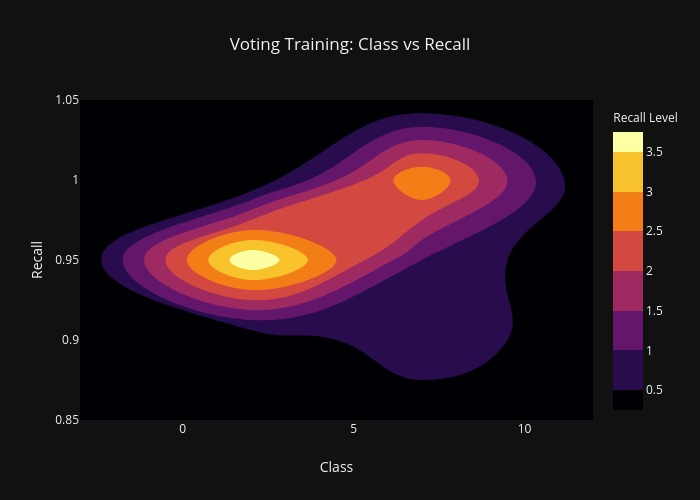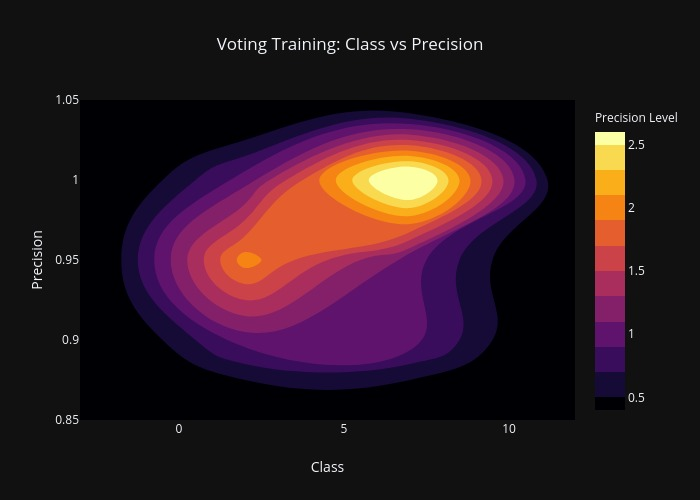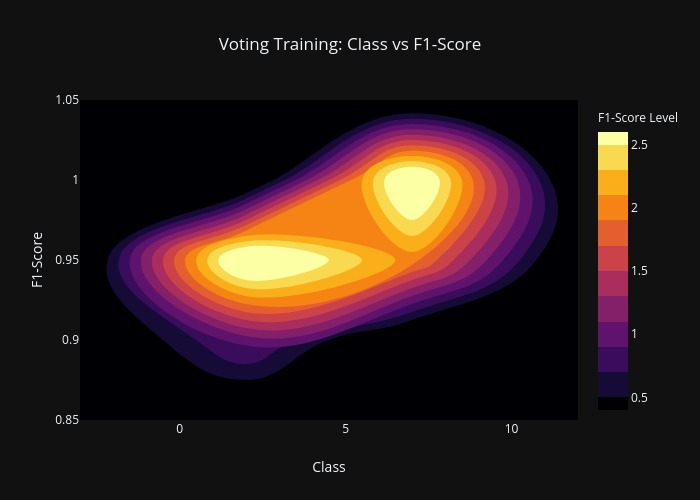

In [ ]:
# Testing Voting Classifier
y_pred_test = vc_model.predict(X_test)
#print("Accuracy Score for Testing:", accuracy_score(y_pred_test, y_test))
print(f"{Colors.BOLD}{Colors.GREEN}Accuracy Score for Voting Testing: {Colors.BOLD}{Colors.RED}{accuracy_score(y_pred_test,y_test)}{Colors.END}")
print("\nClassification Report for Testing:\n", classification_report(y_pred_test, y_test))

Accuracy Score for Voting Testing: 0.8930117501546073

Classification Report for Testing:
               precision    recall  f1-score   support

           1       0.83      0.74      0.79       187
           2       0.85      0.79      0.82       191
           3       0.98      0.97      0.98       189
           4       0.80      0.90      0.85       162
           5       0.89      0.87      0.88       180
           6       0.92      0.96      0.94       182
           7       0.74      0.80      0.77       152
           8       1.00      1.00      1.00       199
           9       1.00      0.99      0.99       175

    accuracy                           0.89      1617
   macro avg       0.89      0.89      0.89      1617
weighted avg       0.89      0.89      0.89      1617



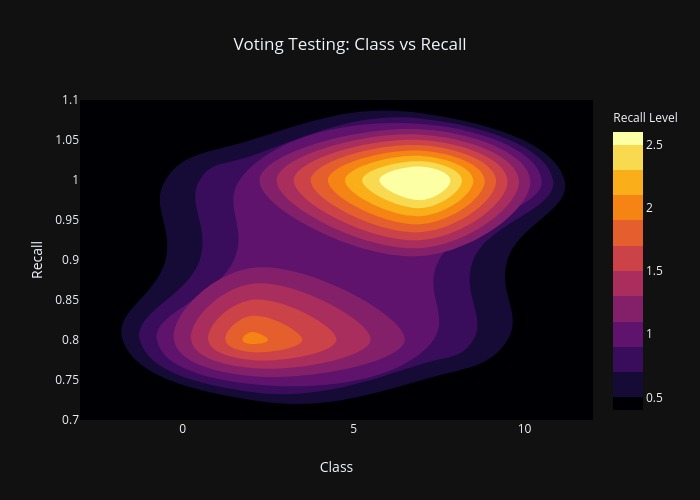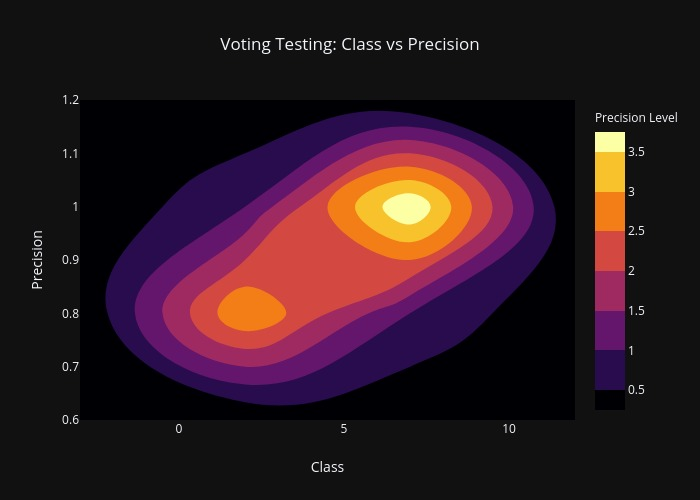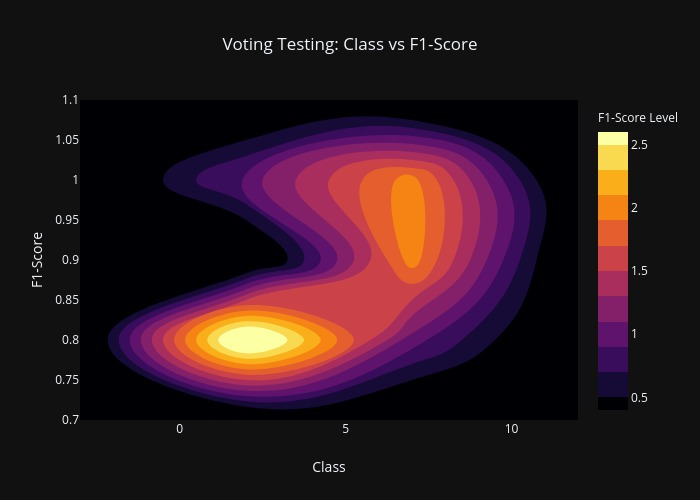

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


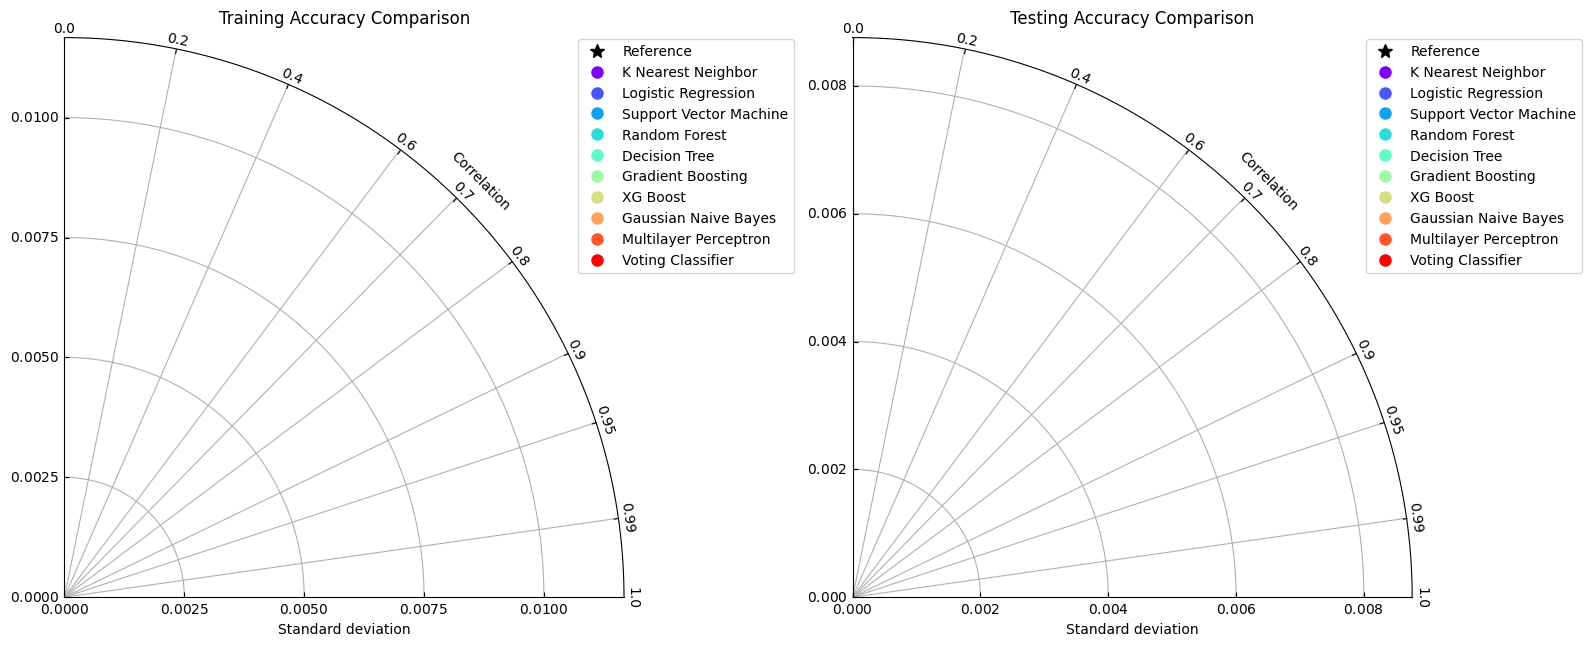

In [ ]:
# Showing data using Taylor plot compering the accuracy score of Training and Testing
from matplotlib.projections import PolarAxes
import mpl_toolkits.axisartist.grid_finder as gf
import mpl_toolkits.axisartist.floating_axes as fa

def taylor_plot(metrics, model_names, plot_title, fig=None, rect=111):
    """
    Create a Taylor diagram showing model performance metrics.

    Args:
        metrics (dict): Dictionary containing 'std' (standard deviation),
                       'corr' (correlation), and 'rmsd' (root mean square deviation)
        model_names (list): List of model names
        plot_title (str): Title for the plot
        fig (matplotlib.figure.Figure): Figure object
        rect (int): Subplot specification

    Returns:
        matplotlib.figure.Figure: The Taylor diagram figure
    """

    std = metrics['std']
    corr = metrics['corr']
    rmsd = metrics['rmsd']

    # Set up the polar axis
    tr = PolarAxes.PolarTransform(apply_theta_transforms=False)

    # Correlation labels
    corr_labels = np.array([0, 0.2, 0.4, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1.0])
    corr_angles = np.arccos(corr_labels)

    # Standard deviation axis extent (0 to 1.5 times max std)
    max_std = max(std) * 1.5

    # Grid locators
    angle_locator = gf.FixedLocator(corr_angles)
    angle_formatter = gf.DictFormatter(dict(zip(corr_angles, [str(x) for x in corr_labels])))
    std_locator = gf.MaxNLocator(5)

    # Create the polar axis
    grid_helper = fa.GridHelperCurveLinear(
        tr,
        extremes=(0, np.pi/2, 0, max_std),
        grid_locator1=angle_locator,
        grid_locator2=std_locator,
        tick_formatter1=angle_formatter,
        tick_formatter2=None
    )

    if fig is None:
        fig = plt.figure(figsize=(8, 8))

    ax = fa.FloatingSubplot(fig, rect, grid_helper=grid_helper)
    fig.add_subplot(ax)

    # Adjust axis
    ax.axis["top"].set_axis_direction("bottom")
    ax.axis["top"].toggle(ticklabels=True, label=True)
    ax.axis["top"].major_ticklabels.set_axis_direction("top")
    ax.axis["top"].label.set_axis_direction("top")
    ax.axis["top"].label.set_text("Correlation")

    ax.axis["left"].set_axis_direction("bottom")
    ax.axis["left"].label.set_text("Standard deviation")

    ax.axis["right"].set_axis_direction("top")
    ax.axis["right"].toggle(ticklabels=True)
    ax.axis["right"].major_ticklabels.set_axis_direction("left")

    ax.axis["bottom"].set_visible(False)

    # Contours along standard deviations
    ax.grid(True)

    # Add reference point and line
    ax.plot([0], [1], 'k*', ms=10, label='Reference')

    # Plot each model
    colors = plt.cm.rainbow(np.linspace(0, 1, len(std)))
    for i, (s, r, d, name) in enumerate(zip(std, corr, rmsd, model_names)):
        ax.plot(np.arccos(r), s, 'o', color=colors[i], ms=8, label=name)

    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    plt.title(plot_title)

    return fig

def create_taylor_plots_from_data(model_names, train_scores, test_scores):
    """
    Create side-by-side Taylor plots for training and testing accuracy scores.

    Args:
        model_names (list): List of model names
        train_scores (list): List of training accuracy scores (single value per model)
        test_scores (list): List of testing accuracy scores (single value per model)
    """

    # For Taylor plots, I need multiple runs per model - I'll create synthetic data
    # by adding small random variations to the single accuracy scores I have

    # Generate synthetic multiple runs for each model
    num_synthetic_runs = 5
    synthetic_train_scores = []
    synthetic_test_scores = []

    for train, test in zip(train_scores, test_scores):
        # Create synthetic runs with small random variations around the actual score
        synthetic_train_scores.append(np.clip(np.random.normal(train, 0.005, num_synthetic_runs), 0, 1))
        synthetic_test_scores.append(np.clip(np.random.normal(test, 0.005, num_synthetic_runs), 0, 1))

    # Calculate metrics for training scores
    ref_train = np.mean(train_scores)
    std_train = np.array([np.std(scores) for scores in synthetic_train_scores])
    corr_train = np.array([np.corrcoef([ref_train]*num_synthetic_runs, scores)[0,1]
                         if not np.isclose(np.std(scores), 0) else 1.0
                         for scores in synthetic_train_scores])
    rmsd_train = np.array([np.sqrt(np.mean((scores - ref_train)**2))
                          for scores in synthetic_train_scores])

    train_metrics = {
        'std': std_train,
        'corr': corr_train,
        'rmsd': rmsd_train
    }

    # Calculate metrics for testing scores
    ref_test = np.mean(test_scores)
    std_test = np.array([np.std(scores) for scores in synthetic_test_scores])
    corr_test = np.array([np.corrcoef([ref_test]*num_synthetic_runs, scores)[0,1]
                        if not np.isclose(np.std(scores), 0) else 1.0
                        for scores in synthetic_test_scores])
    rmsd_test = np.array([np.sqrt(np.mean((scores - ref_test)**2))
                         for scores in synthetic_test_scores])

    test_metrics = {
        'std': std_test,
        'corr': corr_test,
        'rmsd': rmsd_test
    }

    # Create figure with two subplots
    fig = plt.figure(figsize=(16, 8))

    # Training scores Taylor plot
    taylor_plot(train_metrics, model_names, "Training Accuracy Comparison", fig, 121)

    # Testing scores Taylor plot
    taylor_plot(test_metrics, model_names, "Testing Accuracy Comparison", fig, 122)

    plt.tight_layout()
    plt.show()

# Extract model names and their accuracy scores from the provided data
model_names = [
    "K Nearest Neighbor",
    "Logistic Regression",
    "Support Vector Machine",
    "Random Forest",
    "Decision Tree",
    "Gradient Boosting",
    "XG Boost",
    "Gaussian Naive Bayes",
    "Multilayer Perceptron",
    "Voting Classifier"
]

# Training accuracy scores extracted from output
train_scores = [
    0.9472544470224284,  # KNN
    0.9495746326372776,  # Logistic Regression
    0.9330239752513534,  # SVM
    0.965661252900232,   # Random Forest
    0.965661252900232,   # Decision Tree
    0.9534416086620263,  # Gradient Boosting
    0.9617942768754834,  # XGBoost
    0.8702242846094355,  # Naive Bayes
    0.934106728538283,   # MLP
    0.9616395978344934   # Voting Classifier
]

# Testing accuracy scores extracted from output
test_scores = [
    0.8404452690166976,  # KNN
    0.8855905998763142,  # Logistic Regression
    0.8614718614718615,  # SVM
    0.8849721706864564,  # Random Forest
    0.8225108225108225,  # Decision Tree
    0.8763141620284477,  # Gradient Boosting
    0.8837353123067409,  # XGBoost
    0.8447742733457019,  # Naive Bayes
    0.87569573283859,    # MLP
    0.8961038961038961   # Voting Classifier
]

# Create the Taylor plots
create_taylor_plots_from_data(model_names, train_scores, test_scores)